# <p style="text-align: center;"> Проект: Обучение с учителем: качество модели.</p>

**<span style="font-size:24px;">Описание проекта</span>**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.


2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.


3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Ссылка на репозиторий Github https://github.com/Aleksandr0308/Obuch_s_ychitel.git

**<span style="font-size:24px;">Описание данных</span>**

<span style="font-size:18px;">Датасеты:</span>
- **market_file.csv**
- **market_money.csv**
- **market_time.csv**
- **money.csv**

1. Файл **`market_file.csv`** содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- **id** — номер покупателя в корпоративной базе данных.
- **Покупательская активность** —  рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
- **Разрешить сообщать** — — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- **Неоплаченные_продукты_штук_квартал**  — общее число неоплаченных товаров в корзине за последние 3 месяца.
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

 
2. Файл **`market_money.csv`** хранит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- **Выручка** — сумма выручки за период.

3. Файл **`market_time.csv`** — это данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.

4. Файл **`money.csv`** — это данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли.



**<span style="font-size:24px;">Шаги выполнения проекта</span>**

**Шаг 1. Загрузка данных**

**Шаг 2. Предобработка данных**

**Шаг 3. Исследовательский анализ данных**

**Шаг 4. Корреляционный анализ**

**Шаг 5. Объединение таблиц**

**Шаг 6. Использование пайплайнов**

**Шаг 7. Анализ важности признаков**

**Шаг 8. Сегментация покупателей**

**Шаг 9. Общий вывод**

**<span style="font-size:24px;">Импорт библиотек</span>**

In [ ]:
!pip install scikit-learn==1.1.3 -q
!pip install matplotlib==3.5.0 -q
!pip install phik -q
!pip install shap -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV, 
                                     GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   RobustScaler,
                                   OneHotEncoder, 
                                   OrdinalEncoder)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from warnings import simplefilter
from sklearn.metrics import roc_auc_score
import shap

In [ ]:
# игнорируем предупреждения
simplefilter(action='ignore', category=FutureWarning)

##  Загрузка данных

In [ ]:
market_file = pd.read_csv("C:/Users/Александр/OneDrive/Рабочий стол/Обучение с учителем/market_file.csv")
market_money = pd.read_csv("C:/Users/Александр/OneDrive/Рабочий стол/Обучение с учителем/market_money.csv")
market_time = pd.read_csv("C:/Users/Александр/OneDrive/Рабочий стол/Обучение с учителем/market_time.csv")
money = pd.read_csv("C:/Users/Александр/OneDrive/Рабочий стол/Обучение с учителем/money.csv", sep = ';', decimal=',')

In [ ]:
def df_info(df):
    df.info()
    display(df.head())

In [ ]:
df_info(market_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [ ]:
df_info(market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [ ]:
df_info(market_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [ ]:
df_info(money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [ ]:
#Названия столбцов приведем к змеиному регистру
market_file.columns = map(str.lower, market_file.columns)
market_file.columns = market_file.columns.str.replace(" ", "_")

market_money.columns = map(str.lower, market_money.columns)

market_time.columns = map(str.lower, market_time.columns)

money.columns = map(str.lower, money.columns)

In [ ]:
#проверим изменения
print(f'''
Названия столбцов в market_file: {market_file.columns.tolist()};,
Названия столбцов в market_money: {market_money.columns.tolist()}, 
Названия столбцов в market_time: {market_time.columns.tolist()},
Названия столбцов в money: {money.columns.tolist()}
''')


Названия столбцов в market_file: ['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит'];,
Названия столбцов в market_money: ['id', 'период', 'выручка'], 
Названия столбцов в market_time: ['id', 'период', 'минут'],
Названия столбцов в money: ['id', 'прибыль']



**Вывод этапа загрузки данных:**

Данные выгружены успешно

В таблице **`market_file`** 1300 строк и 13 стобцов

В таблице **`market_money`** 3900 строк и 3 столбца

В таблице **`market_time`** 2600 строк и 3 столбца

В таблице **`money`** 1300 строки и 2 столбца

Пропущенные значения отсутствуют

Названия столбцов приведены к змеиному регистру

##  Предобработка данных

### Рассмотрим информацию о таблицах

In [ ]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [ ]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [ ]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [ ]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### Проверим наличие дубликатов в таблицах¶

In [ ]:
market_file.duplicated().sum()

0

In [ ]:
market_money.duplicated().sum()

0

In [ ]:
market_time.duplicated().sum()

0

In [ ]:
money.duplicated().sum()

0

#### Проверим наличие дубликатов в столбцах таблицы market_file

In [ ]:
market_file['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [ ]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [ ]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [ ]:
market_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [ ]:
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

#### Проверим наличие дубликатов в столбцах таблицы market_money

In [ ]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [ ]:
market_money['период'].value_counts()

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: период, dtype: int64

#### Проверим наличие дубликатов в столбцах таблицы market_time

In [ ]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [ ]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

**Вывод этапа предобработки данных:**

Пропущеных значений в таблицах нет.

Типы данных соответствуют значениям.

Явных дубликатов в таблицах не обнаружено.

В некоторых категориальных столбцах исправлены опечатки.


## Исследовательский анализ данных

### Таблица market_file

In [ ]:
market_file.describe()

id  маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       акционные_покупки  средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

In [ ]:
# построим функцию для построения гистограмм и ящика с усами
def hist_box(df, column):
    plt.figure(figsize=(17,4))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения столбца "{column}"', fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.title(f'Гистограмма для "{column}"', fontsize=16)
    sns.histplot(df[column], bins='auto', kde=True)
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца {column}', fontsize=14)
    plt.title(f'Диаграмма размаха для "{column}"', fontsize=16)
    sns.boxplot(x=df[column])

In [ ]:
#числовые признаки таблицы market_file
num_col_market_file = market_file.drop(columns='id').select_dtypes(include='number').columns.tolist()

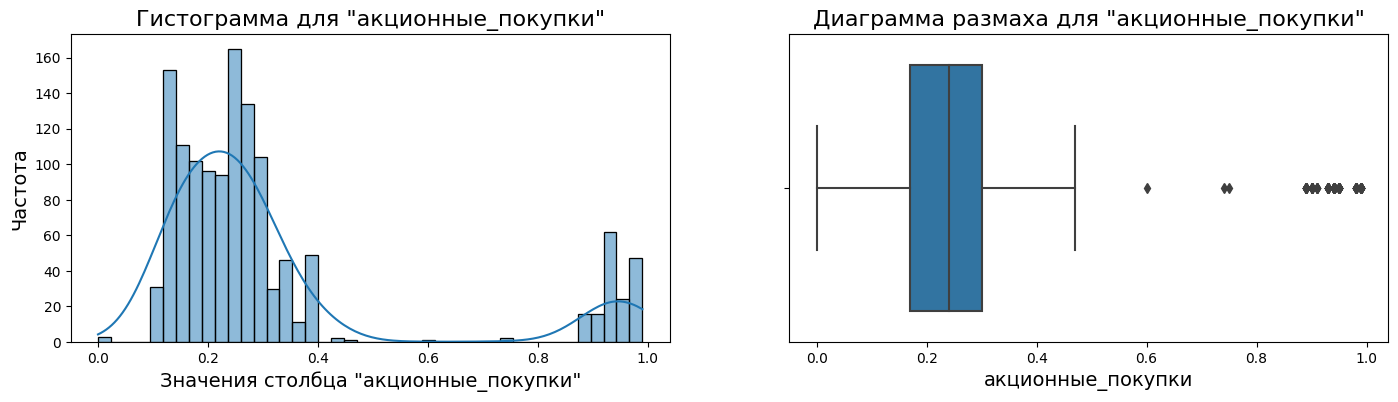

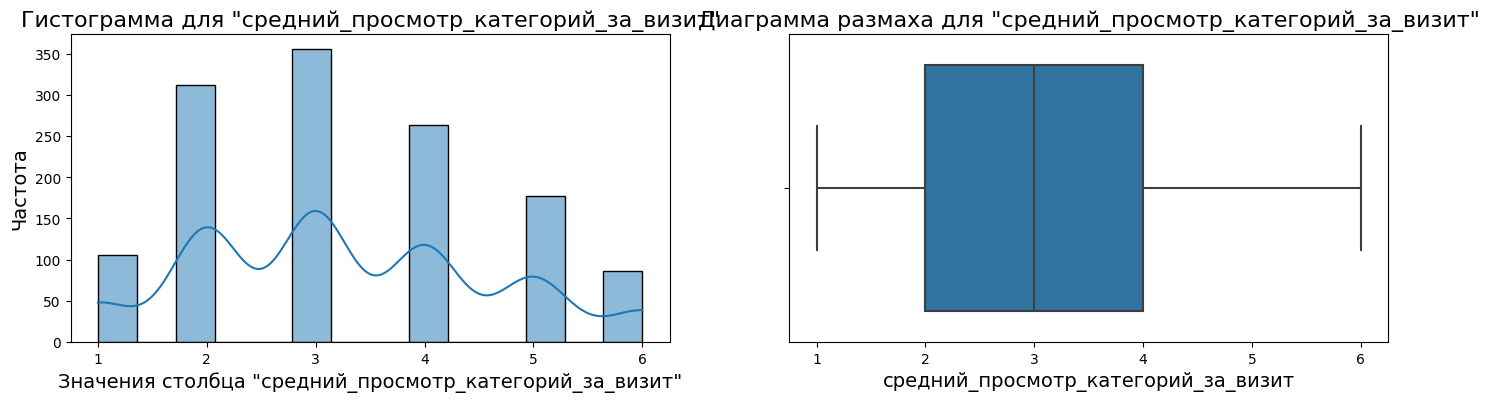

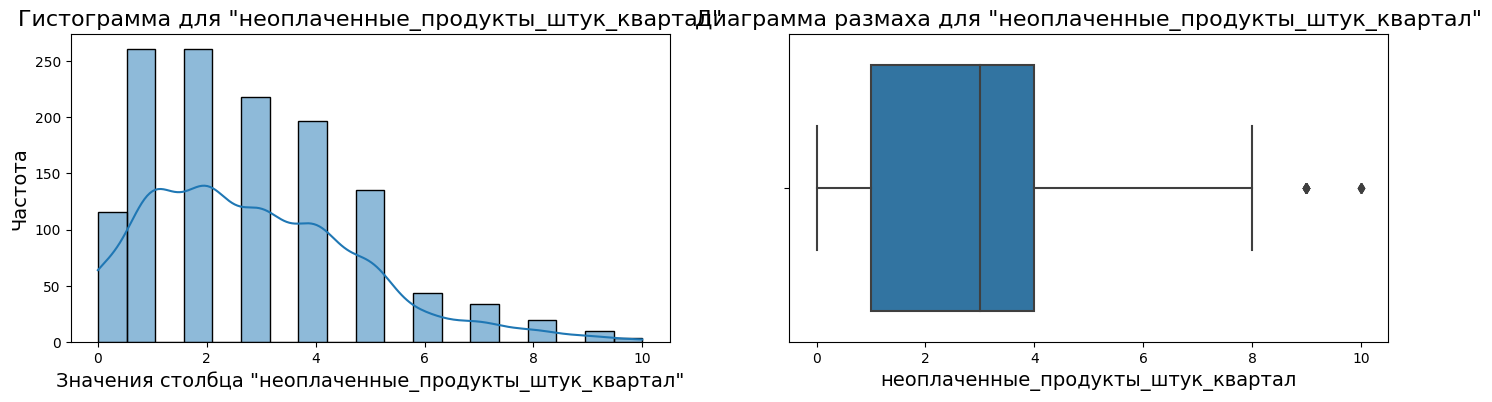

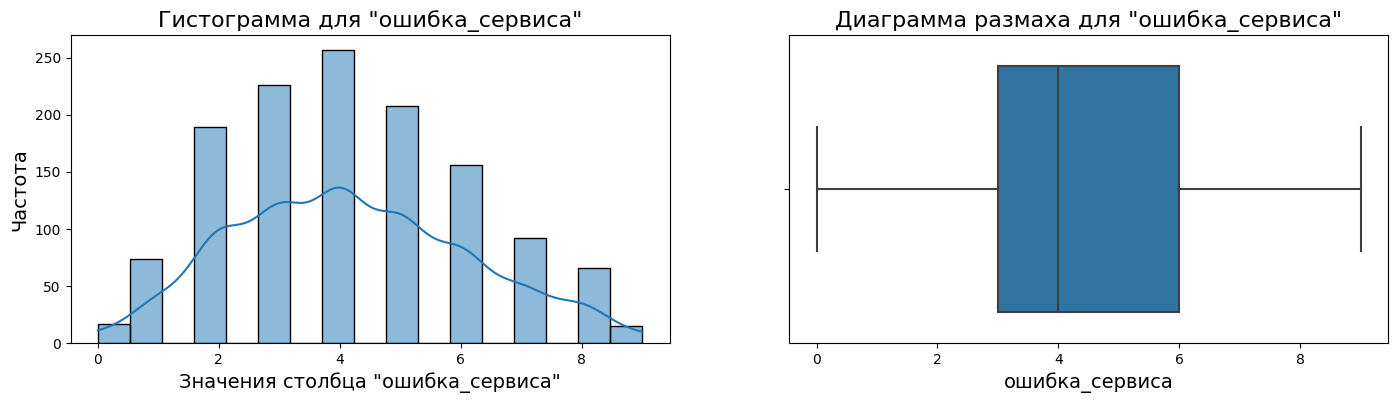

In [ ]:

for name in num_col_market_file:
    hist_box(market_file, name)

**Промежуточный вывод:**
- **маркет_актив_6_мес** Распределение похоже на нормальное с небольшим хвостом малых значений. Минимальное значение 0.9 максимальное 6.6, 50% средних значений расположились в промежутке от3.7 до 4.9. Значения меньше 2.3 можно считать выбросами

- **маркет_актив_тек_мес** данные распределились на три значения (3,4,5) между 25 и 75 процентильем данные со значением 4, значения 3 и 5 выбиваются из распределения 

- **длительность** Распределение похоже на нормальное. Минимальное значение 110 дней максимальное 1079 дней. 50% средних значений расположились в промежутке от 405 до 806

- **акционные_покупки** Распределение похоже на нормальное с небольшим хвостом больших значений. Минимальное значение 0 максимальное 0.99, 50% средних значений расположились в промежутке от 0.17 до 0.3. Значения больше 0.5 можно считать выбросами

- **средний_просмотр_категорий_за_визит** Рапределение немного скошено вправо. 50% средних значений расположились в промежутке от 2 до 4

- **неоплаченные_продукты_штук_квартал**  Распределение скошено вправо. Минимальное значение 0 максимальное 10. 50% средних значений расположились в промежутке от 1 до 4. Значения больше 8 можно считать выбросами

- **ошибка_сервиса** Распределение похоже на нормальное. Минимальное значение 0 максимальное 9. 50% средних значений расположились в промежутке от 3 до 6

- **страниц_за_визит** Распределение скошено вправо. Минимальное значение 1 максимальное 20. 50% средних значений расположились в промежутке от 5 до 11




In [ ]:
def bar(df, column):
    plt.figure(figsize=(17,4))
    plt.subplot()
    plt.xlabel(f'Значения столбца "{column}"', fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.title(f'Частота встречаемости "{column}"', fontsize=16)
    df[column].value_counts().plot.bar(  rot=3)
    for i, (df, value) in enumerate(df[column].value_counts().items()):
        plt.text(i, value -100, f'{value}', ha='center', fontsize=25) 

In [ ]:
cat_col_market_file = market_file.select_dtypes(exclude='number').columns.tolist()

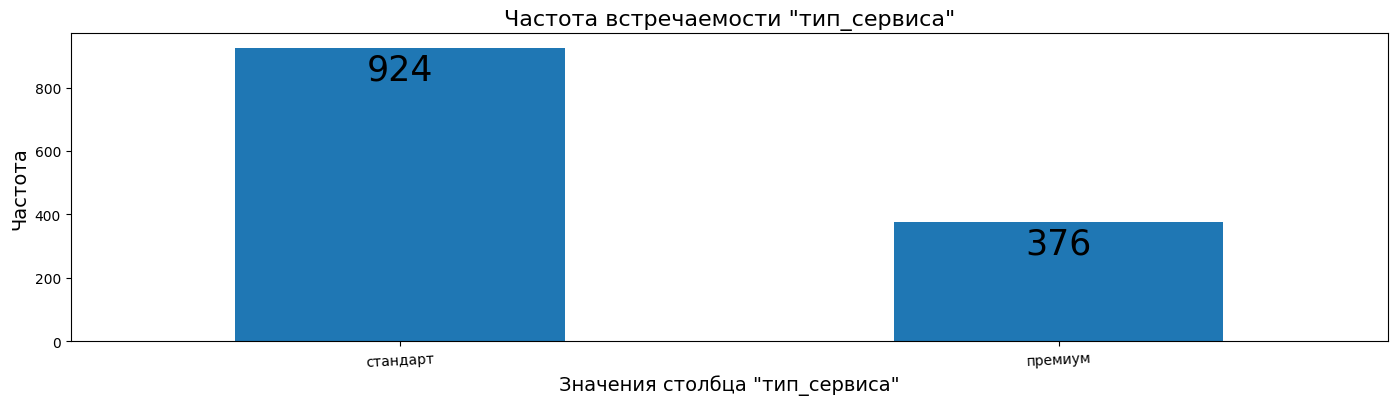

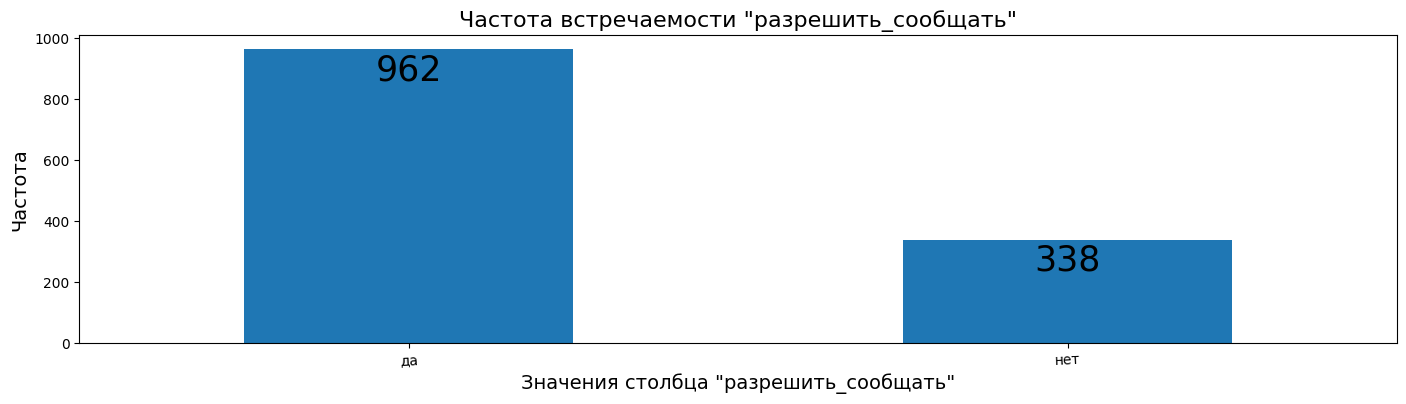

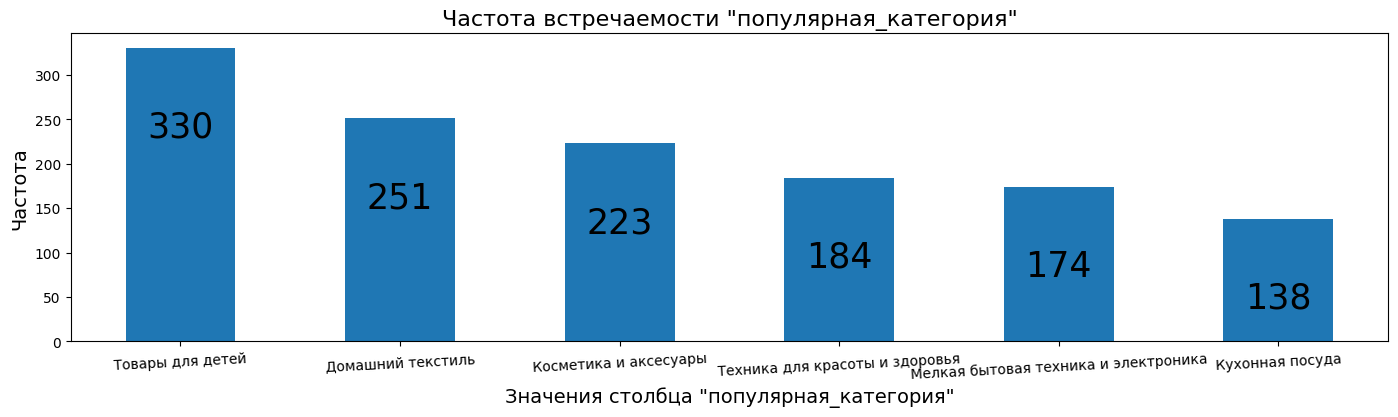

In [ ]:
for name in cat_col_market_file:
    bar(market_file, name)


Стоит отметить что категориальные признаки в таблице **`market_file`** несбалансированы

### Таблица market_money

In [ ]:
market_money.describe()

id        выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

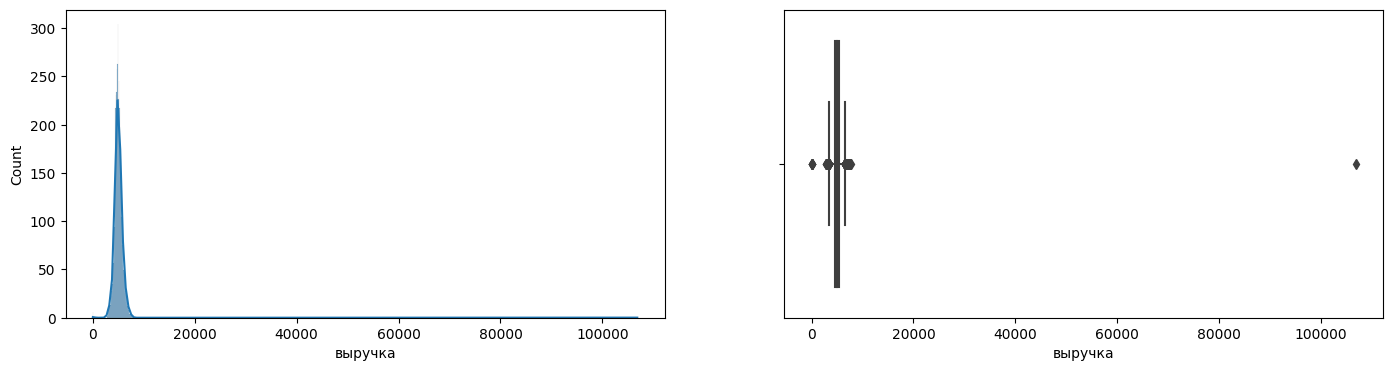

In [ ]:
plt.figure(figsize=(17,4))
plt.subplot(1, 2, 1)
sns.histplot(market_money['выручка'], bins='auto', kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x=market_money['выручка']);

Наблюдается какое-то аномальное значение, рассмотрим его

In [ ]:
market_money.query('выручка>20000')

id         период   выручка
98  215380  текущий_месяц  106862.2

In [ ]:
market_file.query('id==215380')

id покупательская_активность тип_сервиса разрешить_сообщать  \
32  215380                 Снизилась     премиум                нет   

    маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
32                 1.7                     4           637               0.94   

              популярная_категория  средний_просмотр_категорий_за_визит  \
32  Техника для красоты и здоровья                                    3   

    неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
32                                   2               4                 7

Мы видим что один клиенту принес магазину рекордную выручку в текущем месяце, его любимая категория 'Техника для красоты и здоровья	', возможно он приобрел какую-то дорогостоющую технику, такое наблюдение сильно выбивается и помешает при обучении клиента с этим id придется удалить из всех таблиц

In [ ]:
market_file = market_file.query('id!=215380')
market_money = market_money.query('id!=215380')
market_time = market_time.query('id!=215380')
money = money.query('id!=215380')

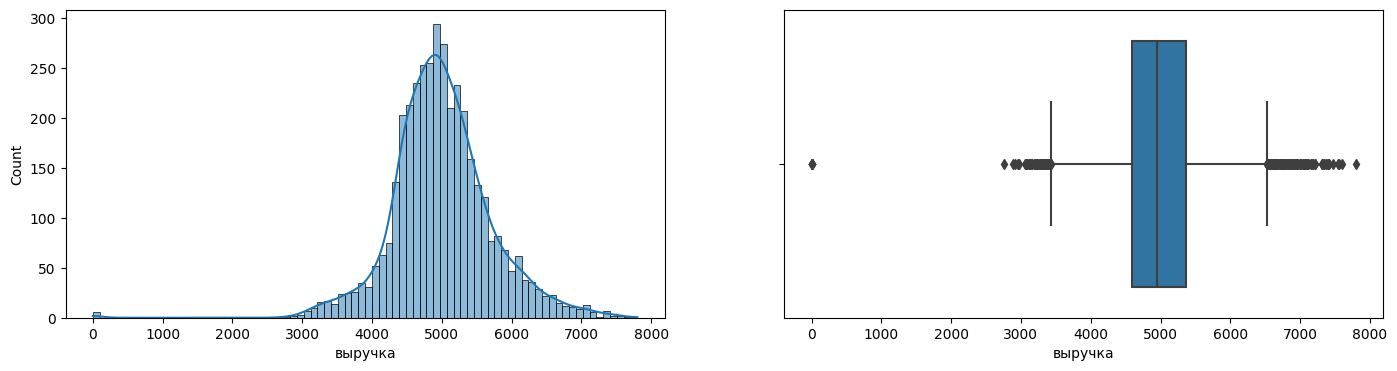

In [ ]:
plt.figure(figsize=(17,4))
plt.subplot(1, 2, 1)
sns.histplot(market_money['выручка'], bins='auto', kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x=market_money['выручка']);

Распределение похоже на нормальное. минимально значение 0 максимальное 7799.4, 50% средних значений расположились в промежутке от 4590 до 5363

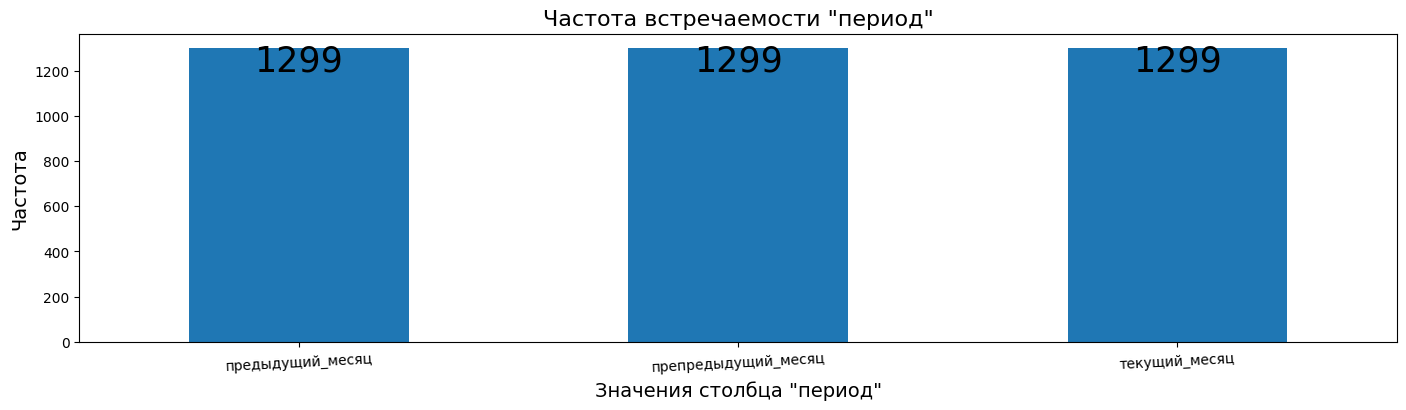

In [ ]:
cat_col_market_money = ['период']
for name in cat_col_market_money:
    bar(market_money, name)


данные идеально сбалансированы

### Таблица market_time

In [ ]:
market_time.describe()

id        минут
count    2598.000000  2598.000000
mean   215997.975366    13.336413
std       375.102733     4.081664
min    215348.000000     4.000000
25%    215673.250000    10.000000
50%    215998.000000    13.000000
75%    216322.750000    16.000000
max    216647.000000    23.000000

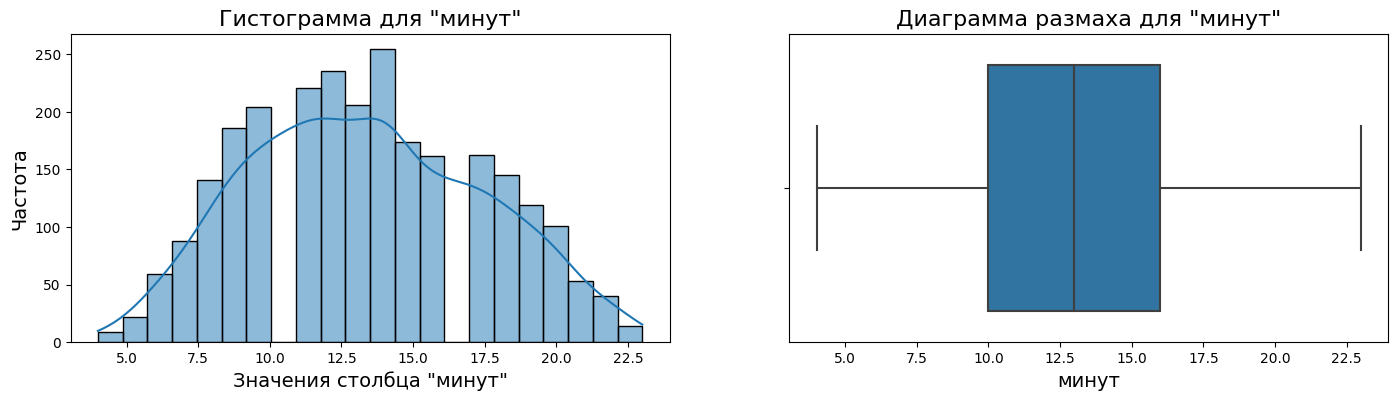

In [ ]:
num_col_market_time = ['минут']
for name in num_col_market_time:
    hist_box(market_time, name)

Данные распределены нормально, минимальное значение 4 максимальное 23. 50% средних значений расположились в промежутке от 10 до 16

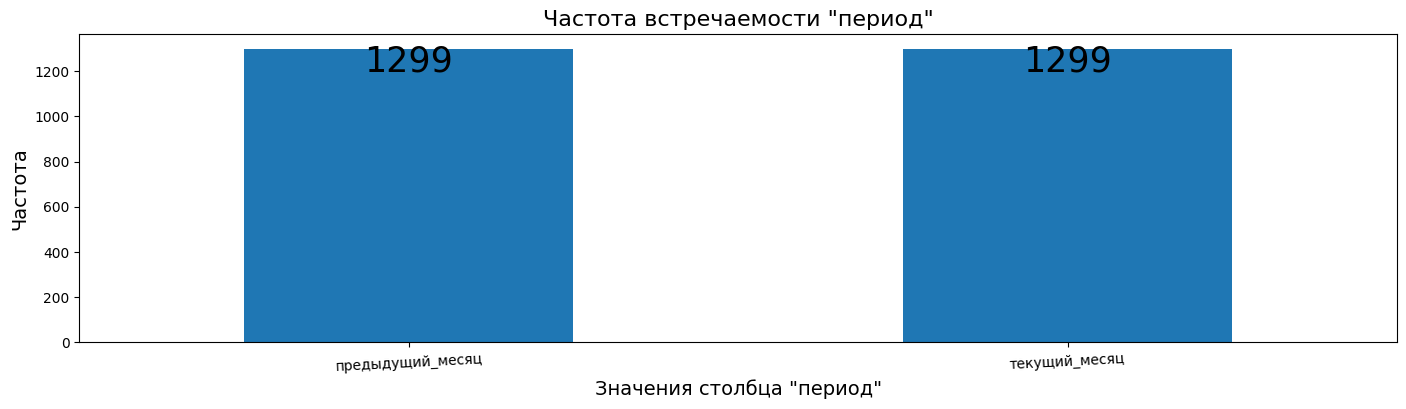

In [ ]:
cut_col_market_time = ['период']
for name in cut_col_market_time:
    bar(market_time, name)

данные идеально сбалансированы

### Таблица money

In [ ]:
money.describe()

id      прибыль
count    1299.000000  1299.000000
mean   215997.975366     3.996721
std       375.174972     1.014107
min    215348.000000     0.860000
25%    215673.500000     3.300000
50%    215998.000000     4.050000
75%    216322.500000     4.670000
max    216647.000000     7.430000

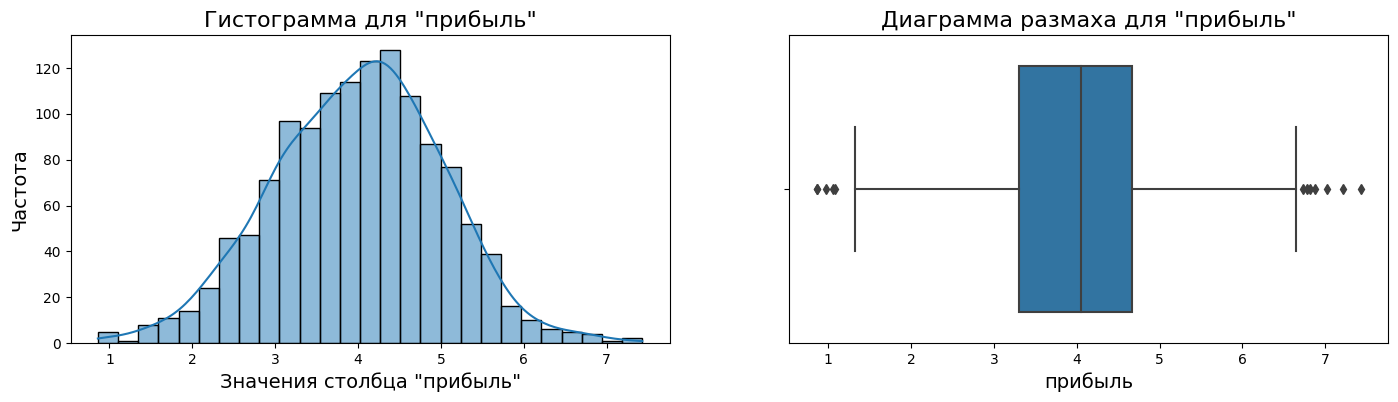

In [ ]:
num_col_money = ['прибыль']
for name in num_col_money:
    hist_box(money, name)

Данные распределены нормально, минимальное значение 0.86 максимальное 7.43 50% средних значений расположились в промежутке от 3.3 до 4.67. 

### Отбор покупателей активных в последние три месяца

In [ ]:
market_money.query('выручка==0')

id               период  выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

три клиента не проявляли активность в предыдущие месяцы удалим эти наблюдения

In [ ]:
market_file = market_file.query('id!=[215348, 215357, 215359]')
market_money = market_money.query('id!=[215348, 215357, 215359]')
market_time = market_time.query('id!=[215348, 215357, 215359]')
money = money.query('id!=[215348, 215357, 215359]')

**Вывод по результатам исследовательского анализа**

В таблице **`market_file`** не все количественные признаки распределены нормально, так же есть выбросы от которых ммы не можем избавиться, так же котегориальные признаки не сбалансированы это стоит учесть при построении модели

В таблицах **`market_money`, `market_time` и `money`** данные распределены нормально, но так же присутствуют выбросы, категориальные признаки сбалансированы.

##  Объединение таблиц

In [ ]:
market_money_grouped = market_money.pivot_table(index=['id'], columns=["период"])
market_money_grouped.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_grouped.sample(5)

выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
216379                    5105.5                       4606.0   
216324                    4852.5                       4473.0   
215476                    5053.0                       4243.0   
215611                    4237.0                       4673.0   
216382                    5339.0                       5026.0   

        выручка_текущий_месяц  
id                             
216379                 5668.4  
216324                 5311.4  
215476                 5957.8  
215611                 4617.9  
216382                 5197.3

In [ ]:
market = market_file.merge(market_money_grouped,
                           on='id', 
                           how='left', 
                          )

In [ ]:
market.sample(5)

id покупательская_активность тип_сервиса разрешить_сообщать  \
154   215506                 Снизилась    стандарт                нет   
207   215559                 Снизилась    стандарт                 да   
1126  216478           Прежний уровень    стандарт                 да   
659   216011           Прежний уровень     премиум                 да   
708   216060           Прежний уровень     премиум                 да   

      маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
154                  3.0                     5           600   
207                  4.4                     3           701   
1126                 2.6                     3           461   
659                  5.6                     4           793   
708                  4.2                     5          1031   

      акционные_покупки   популярная_категория  \
154                0.31      Домашний текстиль   
207                0.30  Косметика и аксесуары   
1126               0.91  Косметика и аксесуары   
659                0.21      Домашний текстиль   
708                0.21      Домашний текстиль   

      средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
154                                     1                                   7   
207                                     4                                   2   
1126                                    3                                   1   
659                                     5                                   2   
708                                     5                                   5   

      ошибка_сервиса  страниц_за_визит  выручка_предыдущий_месяц  \
154                5                 4                    5052.5   
207                4                 4                    5837.0   
1126               3                 9                    5949.5   
659                1                11                    5934.0   
708                9                12                    4693.0   

      выручка_препредыдущий_месяц  выручка_текущий_месяц  
154                        4238.0                 5502.3  
207                        5045.0                 6363.5  
1126                       5612.0                 6372.0  
659                        4893.0                 6966.2  
708                        4792.0                 4737.2

In [ ]:
market_time_grouped = market_time.pivot_table(index=['id'], columns=["период"])
market_time_grouped.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_grouped.sample(5)

минут_предыдущий_месяц  минут_текущий_месяц
id                                                 
215869                      16                   19
215730                      10                    8
216510                      20                   12
216282                      18                   21
215616                      10                    8

In [ ]:
market = market.merge(market_time_grouped,
                           on='id', 
                           how='left', 
                          )

In [ ]:
market.sample(5)

id покупательская_активность тип_сервиса разрешить_сообщать  \
147  215499                 Снизилась    стандарт                 да   
444  215796                 Снизилась    стандарт                нет   
608  215960           Прежний уровень    стандарт                 да   
611  215963           Прежний уровень     премиум                 да   
381  215733                 Снизилась    стандарт                нет   

     маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
147                 3.4                     4           842   
444                 6.3                     4           527   
608                 5.5                     4           724   
611                 4.6                     3           702   
381                 4.0                     4           482   

     акционные_покупки                  популярная_категория  \
147               0.89        Техника для красоты и здоровья   
444               0.21                     Домашний текстиль   
608               0.25        Техника для красоты и здоровья   
611               0.17  Мелкая бытовая техника и электроника   
381               0.24                 Косметика и аксесуары   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
147                                    2                                   8   
444                                    5                                   2   
608                                    5                                   3   
611                                    3                                   3   
381                                    2                                   8   

     ошибка_сервиса  страниц_за_визит  выручка_предыдущий_месяц  \
147               8                 3                    3526.0   
444               5                10                    4582.0   
608               6                 6                    4561.0   
611               5                15                    5143.0   
381               1                 5                    4895.0   

     выручка_препредыдущий_месяц  выручка_текущий_месяц  \
147                       4610.0                 4286.5   
444                       4802.0                 4903.1   
608                       4829.0                 4923.7   
611                       5293.0                 5143.0   
381                       4262.0                 4874.2   

     минут_предыдущий_месяц  минут_текущий_месяц  
147                      14                   10  
444                      16                   16  
608                      13                    8  
611                      17                   17  
381                       9                   14

Данные успешно объединены

## Корреляционный анализ

In [ ]:
# построим таблицу корреляции для всех признаков
market.phik_matrix(verbose=False) 

id  покупательская_активность  \
id                                   1.000000                   0.984597   
покупательская_активность            0.984597                   1.000000   
тип_сервиса                          0.116473                   0.129940   
разрешить_сообщать                   0.019783                   0.000000   
маркет_актив_6_мес                   0.466290                   0.544831   
маркет_актив_тек_мес                 0.000000                   0.000000   
длительность                         0.050714                   0.099901   
акционные_покупки                    0.413956                   0.506276   
популярная_категория                 0.171846                   0.299717   
средний_просмотр_категорий_за_визит  0.353945                   0.539607   
неоплаченные_продукты_штук_квартал   0.418111                   0.505655   
ошибка_сервиса                       0.204583                   0.224154   
страниц_за_визит                     0.608831                   0.749888   
выручка_предыдущий_месяц             0.238373                   0.224638   
выручка_препредыдущий_месяц          0.421755                   0.497393   
выручка_текущий_месяц                0.173750                   0.197213   
минут_предыдущий_месяц               0.564878                   0.685138   
минут_текущий_месяц                  0.473579                   0.576770   

                                     тип_сервиса  разрешить_сообщать  \
id                                      0.116473            0.019783   
покупательская_активность               0.129940            0.000000   
тип_сервиса                             1.000000            0.289965   
разрешить_сообщать                      0.289965            1.000000   
маркет_актив_6_мес                      0.089911            0.000000   
маркет_актив_тек_мес                    0.045258            0.052618   
длительность                            0.401411            0.253831   
акционные_покупки                       0.030010            0.012198   
популярная_категория                    0.070809            0.073684   
средний_просмотр_категорий_за_визит     0.185391            0.070359   
неоплаченные_продукты_штук_квартал      0.120027            0.195982   
ошибка_сервиса                          0.079515            0.021839   
страниц_за_визит                        0.102594            0.042134   
выручка_предыдущий_месяц                0.000000            0.080842   
выручка_препредыдущий_месяц             0.069704            0.000000   
выручка_текущий_месяц                   0.124216            0.060907   
минут_предыдущий_месяц                  0.131814            0.038387   
минут_текущий_месяц                     0.000000            0.000000   

                                     маркет_актив_6_мес  маркет_актив_тек_мес  \
id                                             0.466290              0.000000   
покупательская_активность                      0.544831              0.000000   
тип_сервиса                                    0.089911              0.045258   
разрешить_сообщать                             0.000000              0.052618   
маркет_актив_6_мес                             1.000000              0.079854   
маркет_актив_тек_мес                           0.079854              1.000000   
длительность                                   0.000000              0.174233   
акционные_покупки                              0.279553              0.000000   
популярная_категория                           0.150386              0.136243   
средний_просмотр_категорий_за_визит            0.206788              0.246633   
неоплаченные_продукты_штук_квартал             0.289421              0.144203   
ошибка_сервиса                                 0.142401              0.116946   
страниц_за_визит                               0.396769              0.000000   
выручка_предыдущий_месяц                       0.155476              0.051824   
выручка_препре

In [ ]:
# для наглядности построим тепловую карту коэфициэнтов корреляции
plt.figure(figsize = (17,10))
sns.heatmap(market.phik_matrix(verbose=False) , annot=True, fmt='.3f')
plt.xticks(rotation = 90); 

По тепловой карте можно у видеть что у целевого признака **покупательская_активность**

- Высокая корреляция с признаками **страниц_за_визит, минут_предыдущий_месяц**

- Заметная корреляция с признаками **маркет_актив_6_мес, акционные_покупки, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, выручка_препредыдущий_месяц, минут_текущий_месяц** 

- Умеренная корреляция с признаками **популярная_категория, ошибка_сервиса, выручка_предыдущий_месяц**

- Слабая корреляций с признаками **тип_сервиса, длительность, выручка_текущий_месяц** 

- Корреляции с признаками **маркет_актив_тек_мес, разрешить_сообщать** нет



In [ ]:
# объединим признаки в один
#market['выручка_пред_тек_месяц'] = market['выручка_предыдущий_месяц'] + market['выручка_текущий_месяц']
#market = market.drop(['выручка_текущий_месяц', 'выручка_предыдущий_месяц'], axis=1)

Вывод:

Определили корреляцию входных признаков с целевым, построили тепловую карту корреляции 

## Использование пайплайнов

In [ ]:
# закодируем целевой признак в значения 0 и 1
market['покупательская_активность'] = market['покупательская_активность'].apply( lambda x: 1 if x=='Снизилась' else 0 )

In [ ]:
# сделаем признак акционные_покупки категориальным
market['акционные_покупки'] = market['акционные_покупки'].apply( lambda x: 'Часто покупает по акции'
                                                                          if x>= 0.5 else 'Редко покупает по акции' )

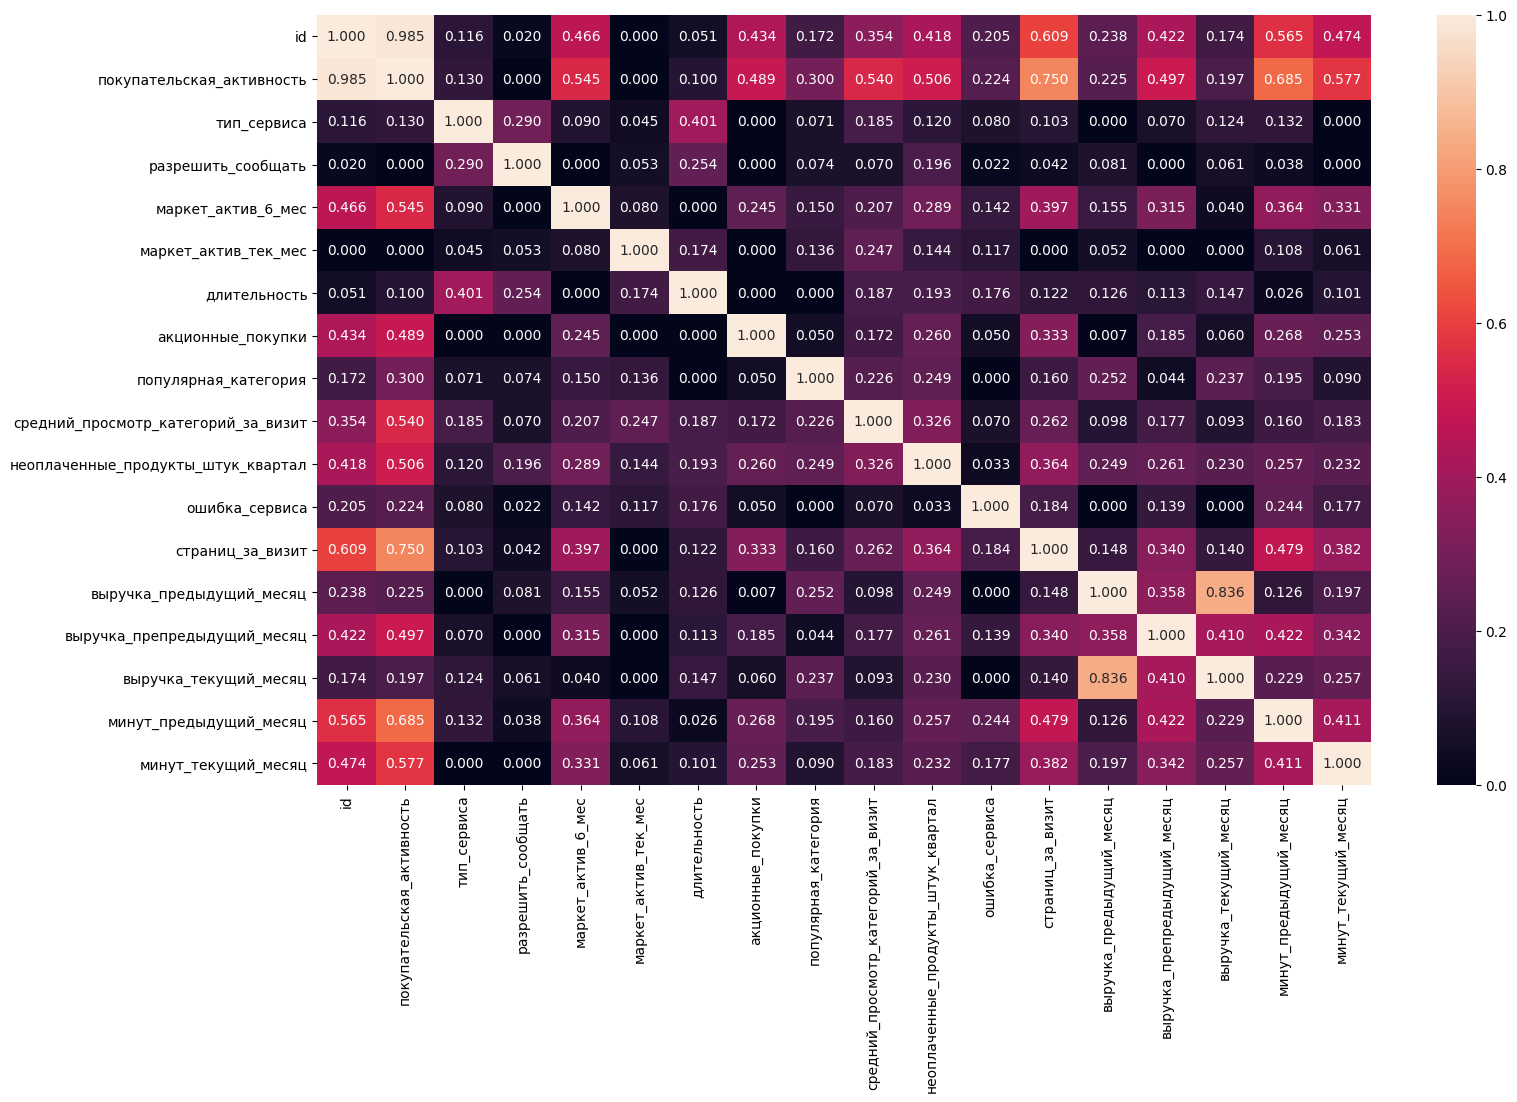

In [ ]:
plt.figure(figsize = (17,10))
sns.heatmap(market.phik_matrix(verbose=False) , annot=True, fmt='.3f')
plt.xticks(rotation = 90); 

После изменения признака его корреляция с целевым признаком незначительно снизилась (с 0,506 до 0,489)

In [ ]:
# признак id сделаем индексом он не понадобится при обучении
market = market.set_index('id')

In [ ]:
market.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                 
215349                          1     премиум                 да   
215350                          1    стандарт                нет   
215351                          1    стандарт                 да   
215352                          1    стандарт                нет   
215353                          1    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

              акционные_покупки популярная_категория  \
id                                                     
215349  Часто покупает по акции     Товары для детей   
215350  Редко покупает по акции    Домашний текстиль   
215351  Часто покупает по акции     Товары для детей   
215352  Часто покупает по акции     Товары для детей   
215353  Редко покупает по акции    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215349                    5216.0                       4472.0   
215350                    5457.5                       4826.0   
215351                    6158.0                       4793.0   
215352                    5807.5                       4594.0   
215353                    4738.5                       5124.0   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
id                                                                          
215349                 4971.6                      12                   10  
215350                 5058.4                       8                   13  
215351                 6610.4                      11                   13  
215352                 5872.5                       8                   11  
215353                 5388.5                      10                   10

In [ ]:
# определим константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [ ]:
# разделим данные на тренировочную и тестовую выборки
X = market.drop('покупательская_активность', axis=1)
y = market['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(972, 16)
(972,)
(324, 16)
(324,)


In [ ]:
# признаки для OneHotEncoder
ohe_columns = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
# признаки для OrdinalEncoder
ord_columns = ['акционные_покупки']
# количественные признаки
num_columns =  X.select_dtypes(include='number').columns.tolist()

In [ ]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
)

In [ ]:
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[['Редко покупает по акции', 'Часто покупает по акции']],
                               handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [ ]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)    
    ], 
    remainder = 'passthrough'
)

In [ ]:
pipe_final = Pipeline(
    [
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)


In [ ]:
param_distributions = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__max_features': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,7),
        'models__p': range(1,3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')],
        'models__C': [0.001, 0.01, 0.1, 1],
        'models__penalty': ['l1', 'l2'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [ ]:
# поиск оптимальной модели
rs = RandomizedSearchCV(
    pipe_final, 
    param_distributions,
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1,
    random_state=RANDOM_STATE
) 
# обучение модели на тренировочных данных
rs.fit(X_train, y_train) 


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['тип_сервиса',
                                                                                'разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simple...
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': [0.001, 0.01, 0.1, 1],
                                         'models__penalty': ['l1', 'l2'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ['poly', 'rbf',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

Выбранная метрика **ROC-AUC** хорошо подходит для нашей задачи. Напомню что нам нужно определить снижение покупательской активности,  а значит бизнесу важно не пропустить таких клиентов, при этом так же важно не совершать ложноположительные ошибки т.е. предсказывать снижение там где его нет, что приведет к ненужным тратам со стороны бизнеса и может оттолкнуть лояльных клиентов.

**ROC-AUC** находит баланс между долей положительных объектов, правильно предсказанных положительными и долей отрицательных объектов, неверно предсказанных положительными, при этом если в будущем компания решит изменить порог классификации это не повлияет на метрику так как она находит баланс при любых возможных порогах классификации.

In [ ]:
print('Метрика ROC-AUC для лучшей модели:\n', round(rs.best_score_, 4)) 
print('\nЛучшая модель и её параметры:\n\n', rs.best_params_) 

Метрика ROC-AUC для лучшей модели:
 0.8962

Лучшая модель и её параметры:

 {'preprocessor__num': StandardScaler(), 'models__penalty': 'l1', 'models__C': 1, 'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')}


In [ ]:
y_pred = rs.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_pred), 4)}')

Метрика ROC-AUC на тестовой выборке: 0.9168


И так мы получили лучшую модель, ей стала **LogisticRegression** с **l1** регуляризацией ее **ROC-AUC** на тренировочной выборке 0.8962, на тестовой 0.9168

## Анализ важности признаков

In [ ]:
X_train_encoded = rs.best_estimator_['preprocessor'].fit_transform(X_train)

explainer = shap.LinearExplainer(rs.best_estimator_['models'], X_train_encoded)

X_test_encoded = rs.best_estimator_['preprocessor'].transform(X_test)

feature_names = rs.best_estimator_['preprocessor'].get_feature_names_out()

X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)
 
shap_values = explainer(X_test_encoded)
 
shap.summary_plot(shap_values, plot_type='bar', max_display=30,  plot_size=(15,8))


Сильнее всего на прогноз модели влияют 7 признаков **num__страниц_за_визит // num__средний_просмотр_категорий_за_визит // num__минут_предыдущий_месяц // num__минут_текущий_месяц // num__неоплаченые_продукты_штук_квартал // num__маркет_актив_6_мес // ord__акционные_покупки**

признаки **ohe__разрешить_сообщать_нет // num__маркет_актив_тек_мес // ohe__тип_сервиса_премиум // ohe__популярная _категория_Косметика и аксесуары** едва заметно влияют на модель

признаки **ohe__популярная _категория_Кухонная посуда // ohe__популярная _категория_Товары для детей // ohe__разрешить_сообщать_да // ohe__тип_сервиса_стандарт** вообще не влияют на модель

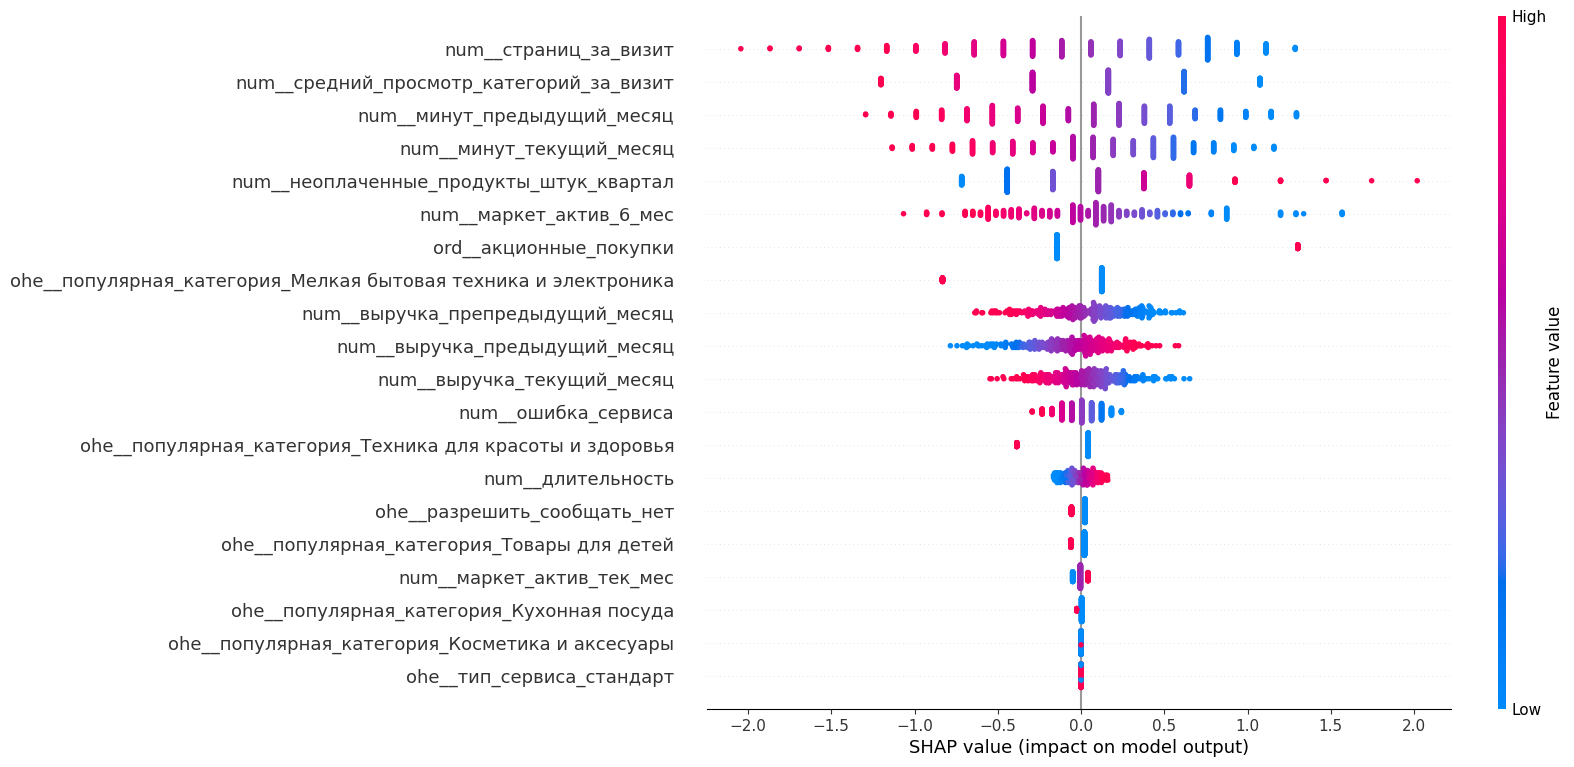

In [ ]:
shap.plots.beeswarm(shap_values, max_display=30, plot_size=(12,9))

Высокие значения признаков **num__страниц_за_визит // num__средний_просмотр_категорий_за_визит // num__минут_предыдущий_месяц // num__минут_текущий_месяц** склоняют модель присвоить целевому признаку значение 0(активность не снизилась), это логично если человек проводит на сайте много времени и просматривает много товаров значит он заинтересован в покупке.

признак  **num__неоплаченые_продукты_штук_квартал** показывает обратную зависимость: чем меньше товаров человек оставляет неоплаченными в корзине тем больше вероятность отнесения к классу 0(активность не снизилась)

Высокие значения признака **num__маркет_актив_6_мес** склоняют модель присвоить целевому признаку значение 0(активность не снизилась), это говорит о том, что реклама работает.

В признаке **ord__акционные_покупки** тенденция такова что если человек часто покупает по акции, то вероятность отнесения к классу 1(активность снизилась)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

##  Сегментация покупателей

In [ ]:
X_test_seg = X_test.copy()
X_train_seg = X_train.copy()
X_test_seg['вероятность_снижения'] = rs.predict_proba(X_test)[:,1]
X_train_seg['вероятность_снижения'] = rs.predict_proba(X_train)[:,1]
seg_df = pd.concat([X_train_seg, X_test_seg])

money = money.set_index('id')
seg_df = seg_df.join(money)

In [ ]:
seg_df.sample(5)

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215431     премиум                 да                 3.9   
215568     премиум                 да                 4.0   
216280    стандарт                 да                 6.6   
216117    стандарт                 да                 4.2   
216444     премиум                 да                 5.7   

        маркет_актив_тек_мес  длительность        акционные_покупки  \
id                                                                    
215431                     4           666  Редко покупает по акции   
215568                     5          1073  Редко покупает по акции   
216280                     4           374  Редко покупает по акции   
216117                     5           503  Редко покупает по акции   
216444                     5           423  Редко покупает по акции   

                        популярная_категория  \
id                                             
215431                       Кухонная посуда   
215568                      Товары для детей   
216280                     Домашний текстиль   
216117                     Домашний текстиль   
216444  Мелкая бытовая техника и электроника   

        средний_просмотр_категорий_за_визит  \
id                                            
215431                                    3   
215568                                    4   
216280                                    4   
216117                                    5   
216444                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215431                                   3               6                 7   
215568                                   2               3                 3   
216280                                   3               8                14   
216117                                   5               5                19   
216444                                   2               6                15   

        выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215431                    5455.5                       4692.0   
215568                    2909.0                       4740.0   
216280                    5063.0                       4769.0   
216117                    4391.5                       4603.0   
216444                    4266.5                       4694.0   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                                           
215431                 6184.8                      12                   14   
215568                 3933.4                      10                   10   
216280                 5447.8                      17                    9   
216117                 4338.2                      20                    9   
216444                 4026.0                      22                   14   

        вероятность_снижения  прибыль  
id                                     
215431              0.501131     4.28  
215568              0.658998     5.49  
216280              0.036068     2.83  
216117              0.049478     2.76  
216444              0.004949     3.38

In [ ]:
#отберем клиентов вероятность снижения активности которых больше 0.7 и прибыль больше 3

seg_1 = seg_df.query('вероятность_снижения >= 0.7 and прибыль >= 3')
seg_2 = seg_df.query('вероятность_снижения < 0.7 and прибыль < 3')


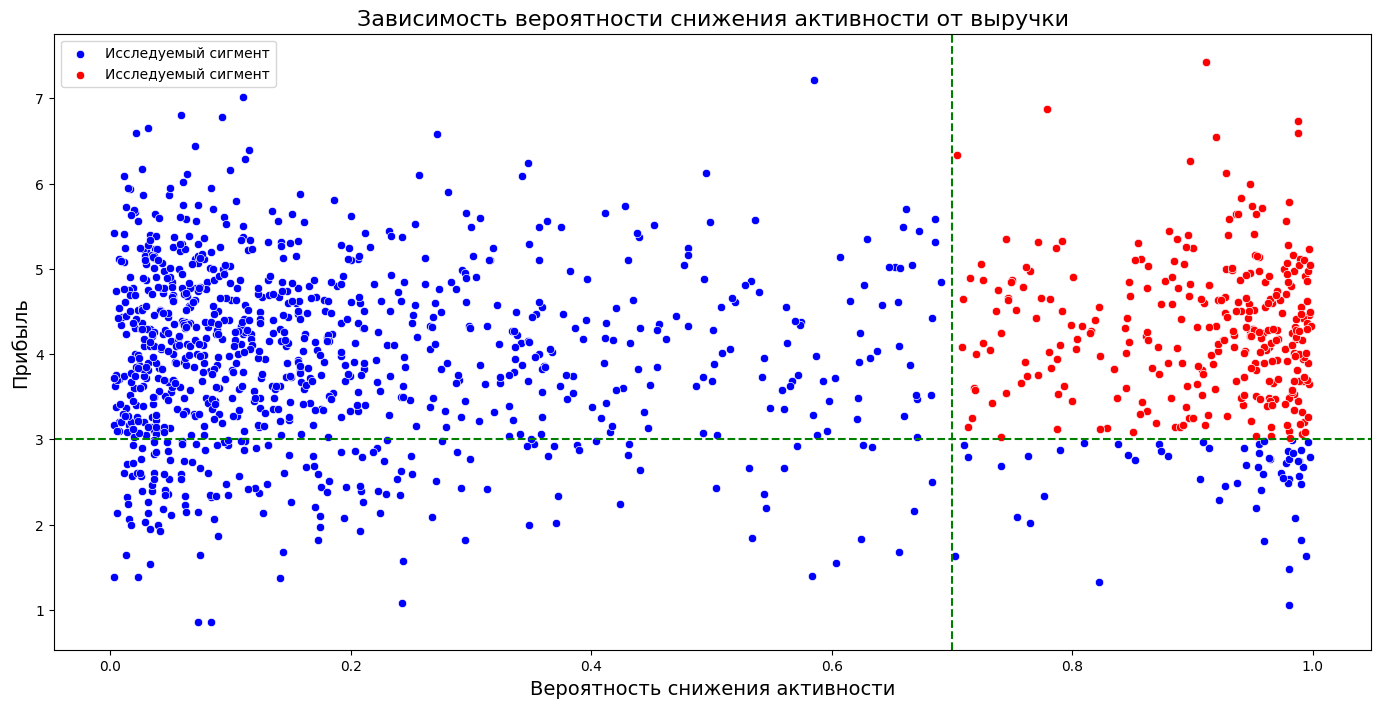

In [ ]:
fig = plt.figure(figsize=(17,8))
sns.scatterplot(data=seg_df, y='прибыль', x='вероятность_снижения',
                label = 'Исследуемый сигмент', color = 'blue')

sns.scatterplot(data=seg_1, y='прибыль', x='вероятность_снижения',
                label = 'Исследуемый сигмент', color = 'red')

plt.legend()
plt.axvline(x = 0.7, color = 'green', linestyle = '--')
plt.axhline(y = 3, color = 'green', linestyle = '--')
plt.xlabel('Вероятность снижения активности', fontsize=14)
plt.ylabel('Прибыль', fontsize=14)
plt.title('Зависимость вероятности снижения активности от выручки', fontsize=16)
plt.show()

Отобрали сегмент покупателей с большой вероятностью снижения покупательской активности и прибылью от 3

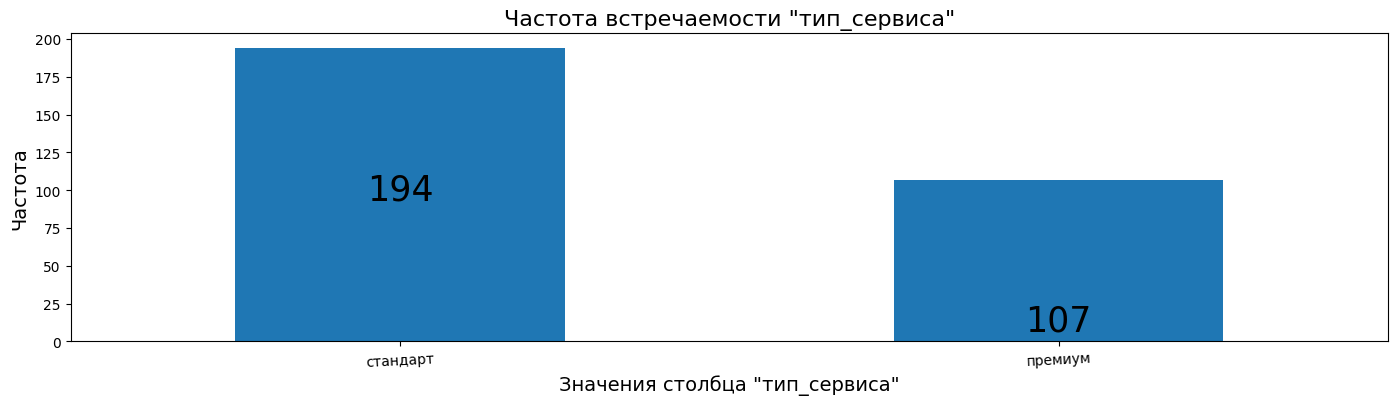

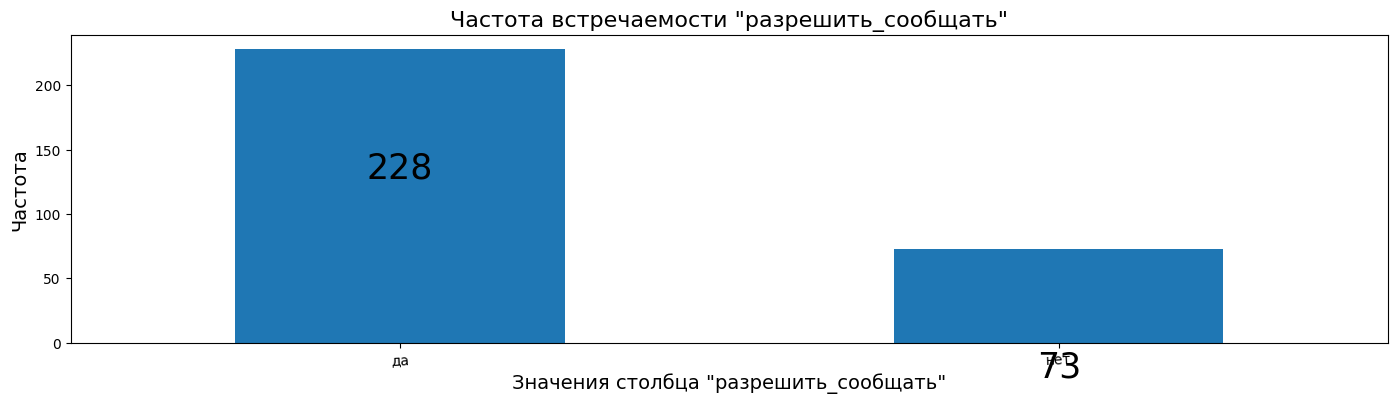

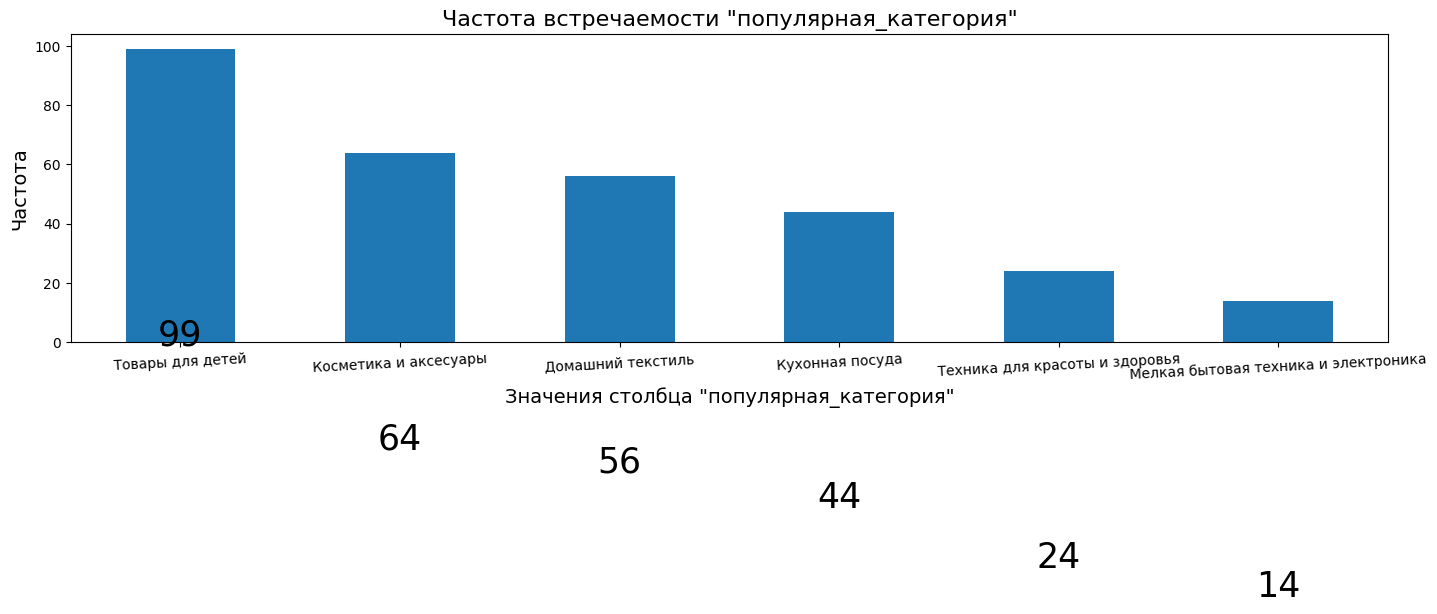

In [ ]:
cat_col_seg_1 = seg_1.select_dtypes(exclude='number').columns.tolist()
for name in cat_col_seg_1:
    bar(seg_1, name)

В данном сегменте преобладает тип сервиса **"стандарт"** в столбце разрешить сообщать чаще указываю **"да"**, тех кто часто покупает по акции меньше чем техкто редко, самая популярная категория **"Товары для детей"**

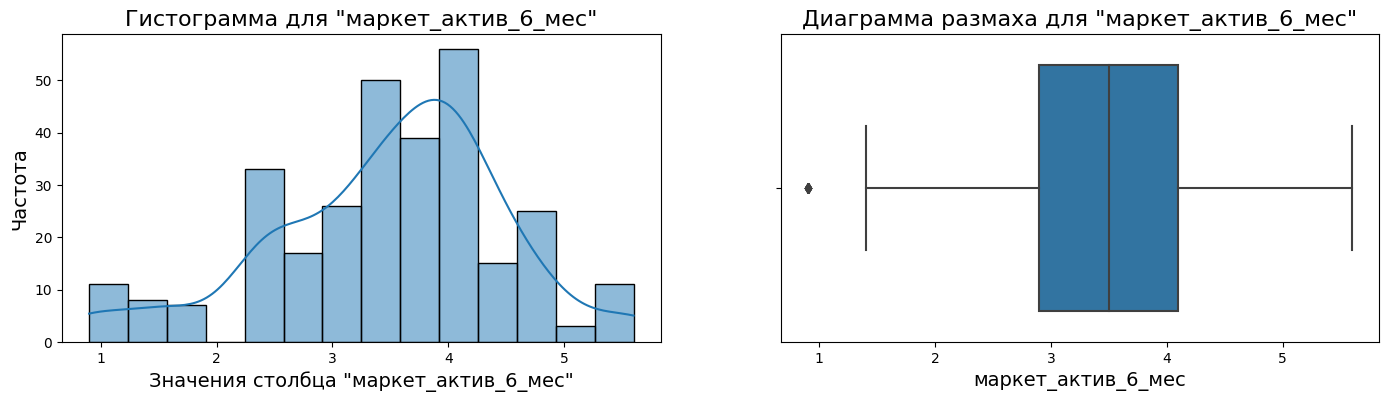

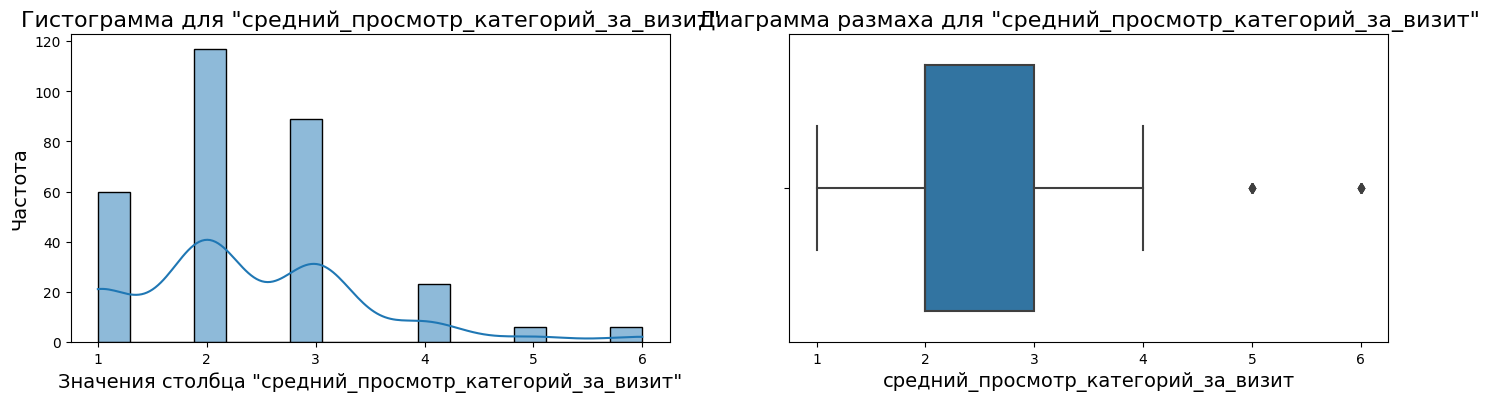

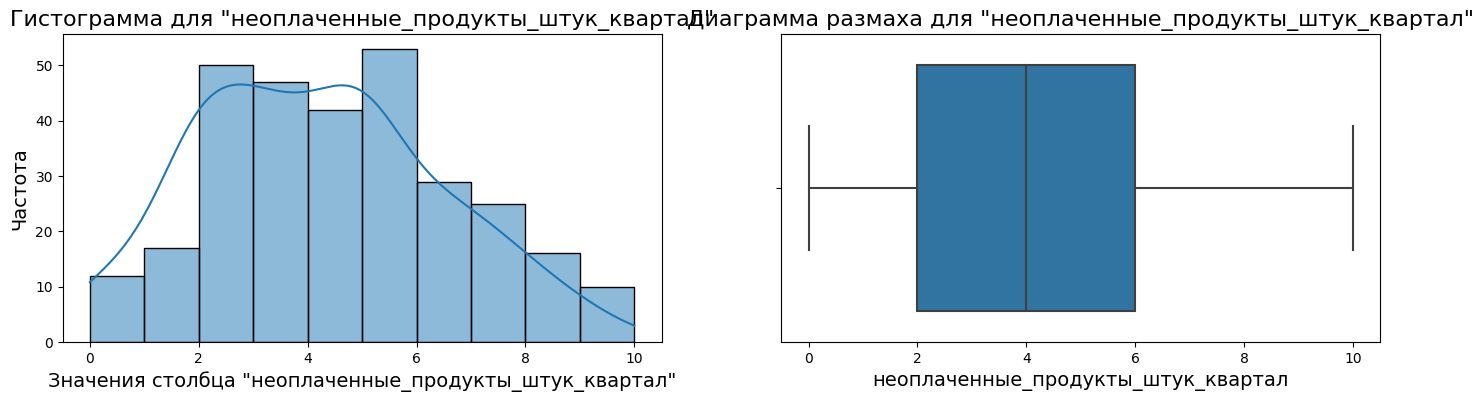

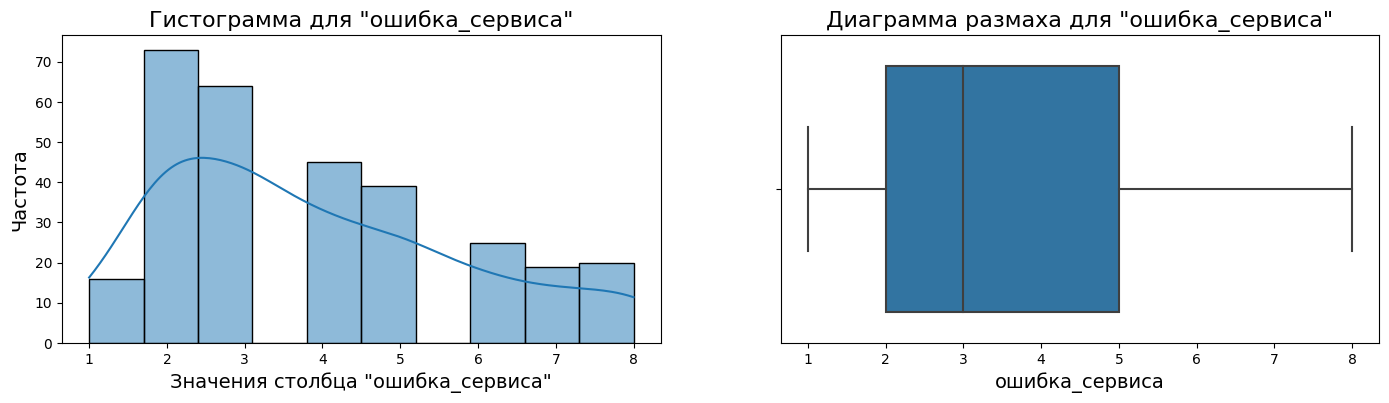

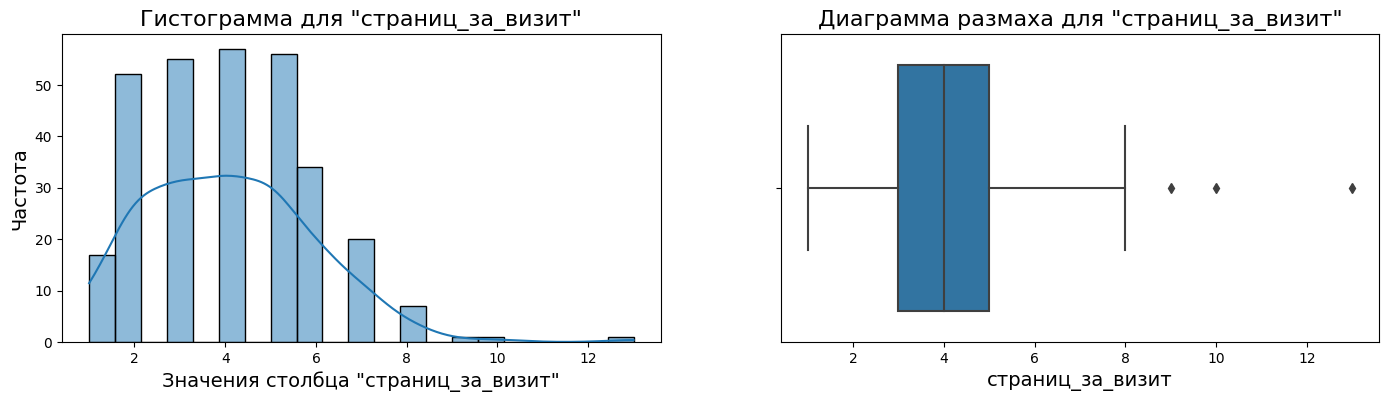

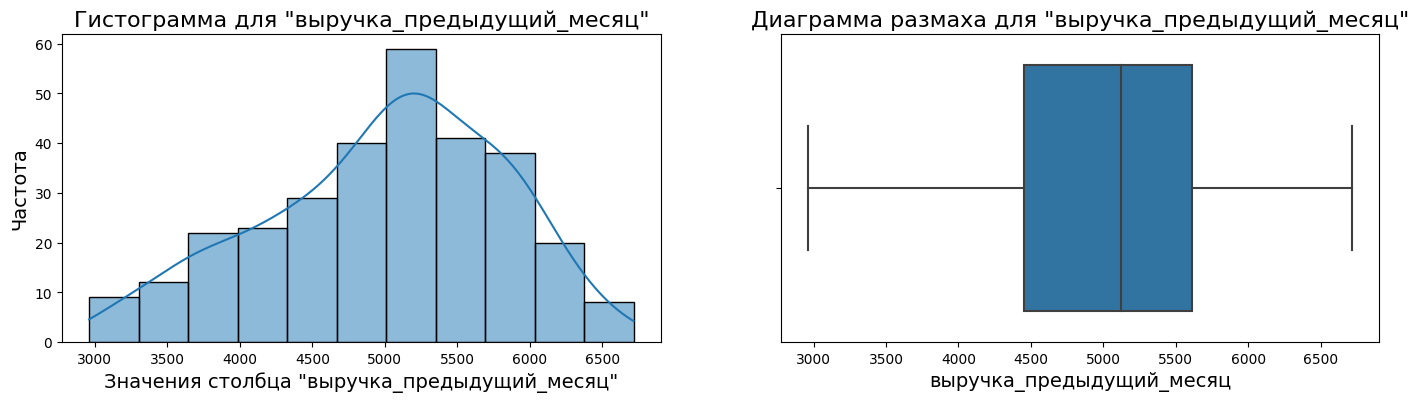

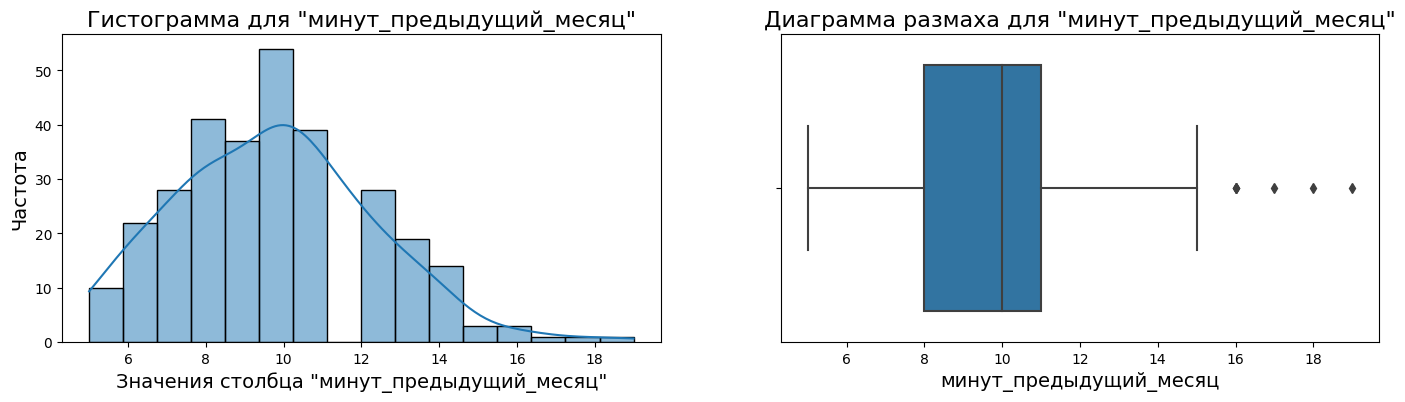

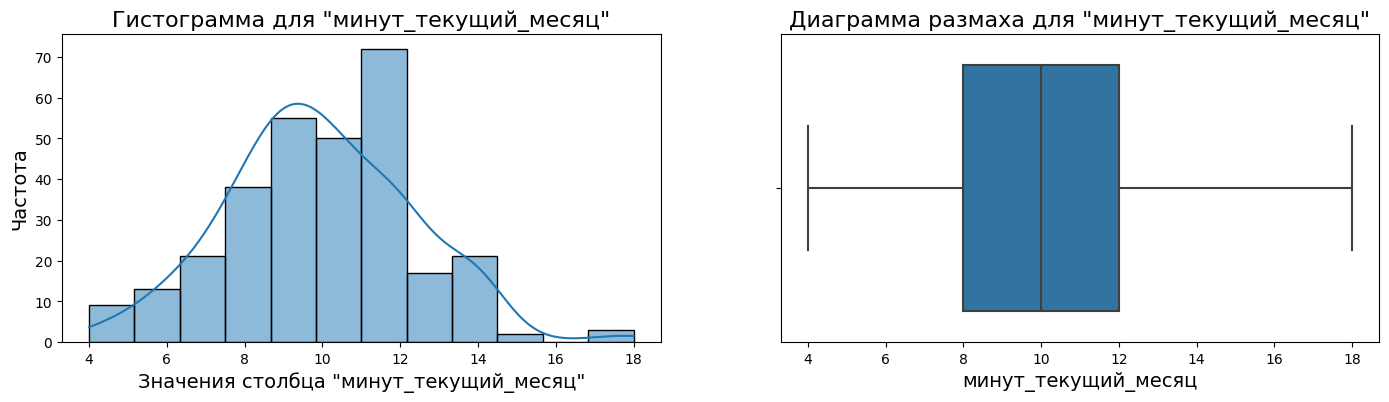

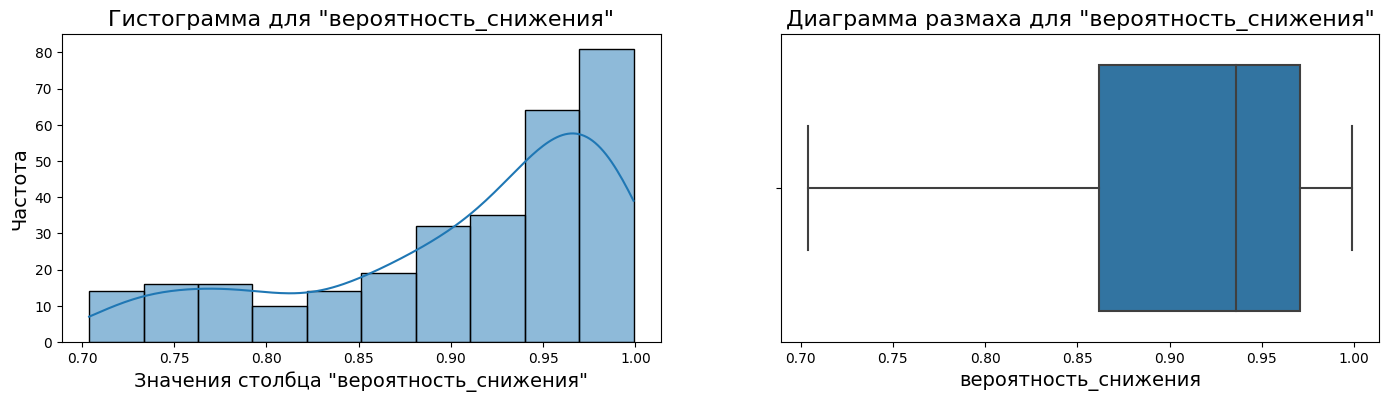

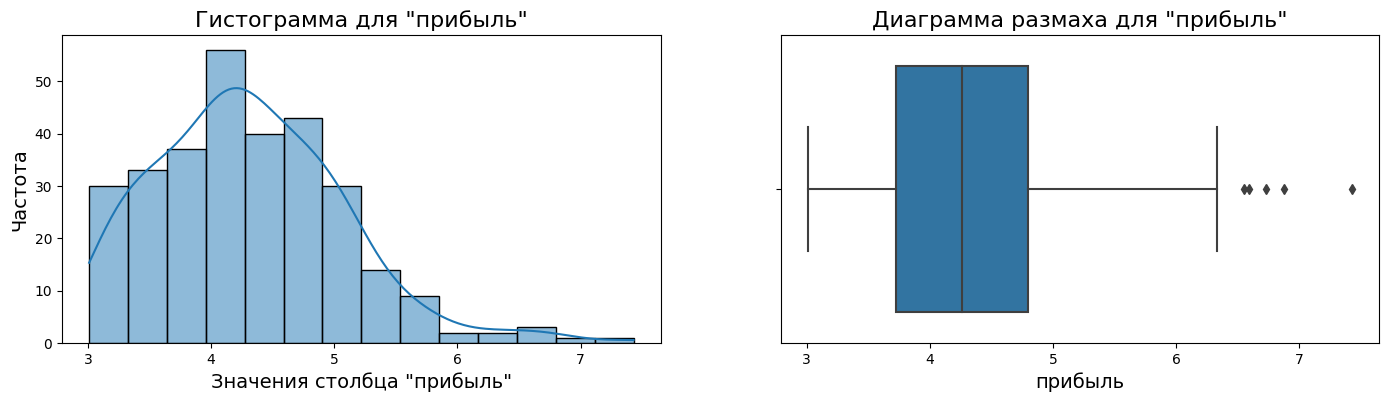

In [ ]:
num_col_seg_1 = seg_1.select_dtypes(include='number').columns.tolist()
for name in num_col_seg_1:
    hist_box(seg_1, name)

Среди количественных признаков стоит обратить внимание на то, что средний просмотр категорий за визит практически не превышает 2-3 категории, так же люди просматривают 2-6 страниц за визит и в корзине хранят 4-6 неоплаченых продуктов, это говорит о том что эти люди знают ассортимент и обычно покупают знакомые товары не тратя много времени на выбор

In [ ]:
def scatterplots(columns):
    for col in columns:
        fig = plt.figure(figsize=(17,5))
        sns.scatterplot(data=seg_1, y='прибыль', x='вероятность_снижения', hue=col)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title('Зависимость вероятности снижения активности от выручки')
        plt.show()

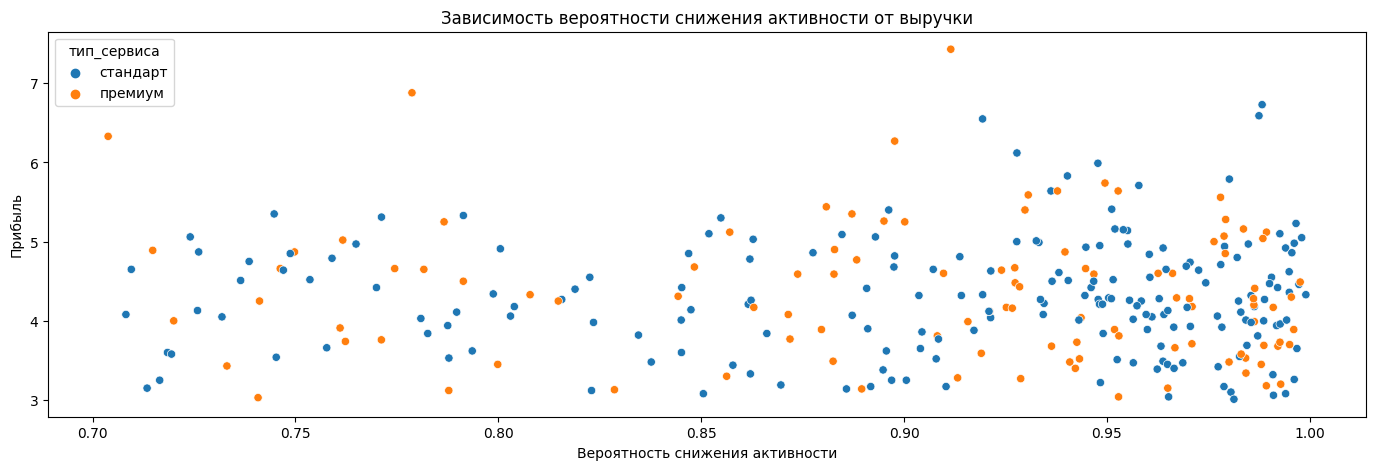

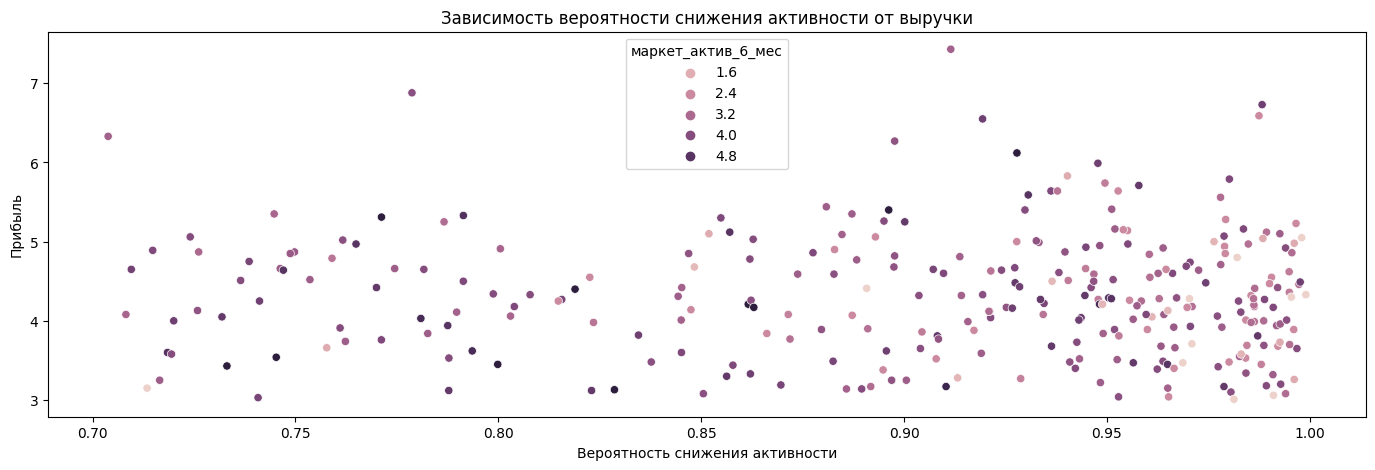

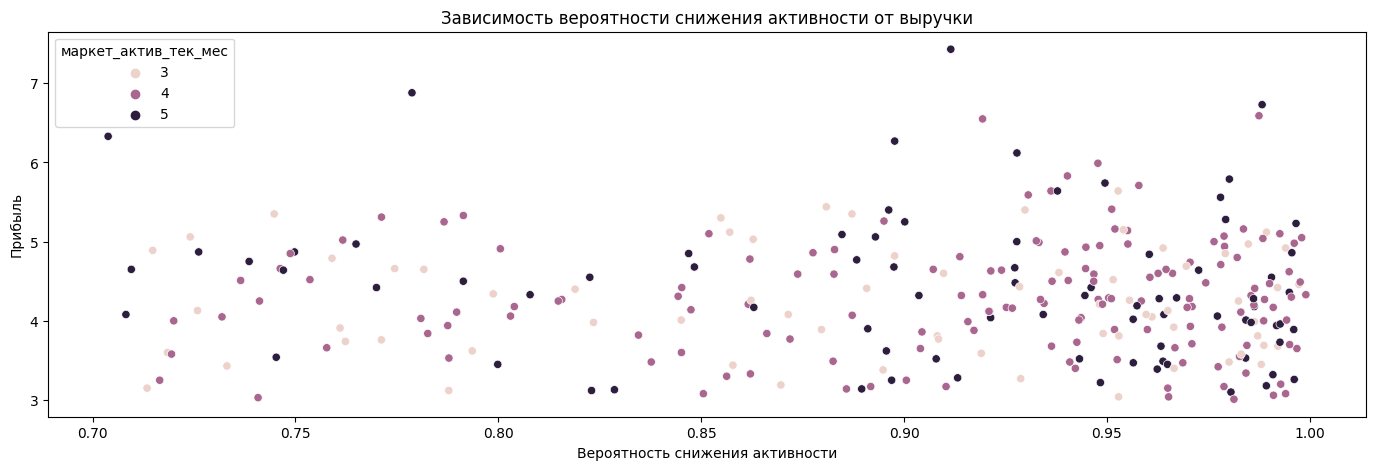

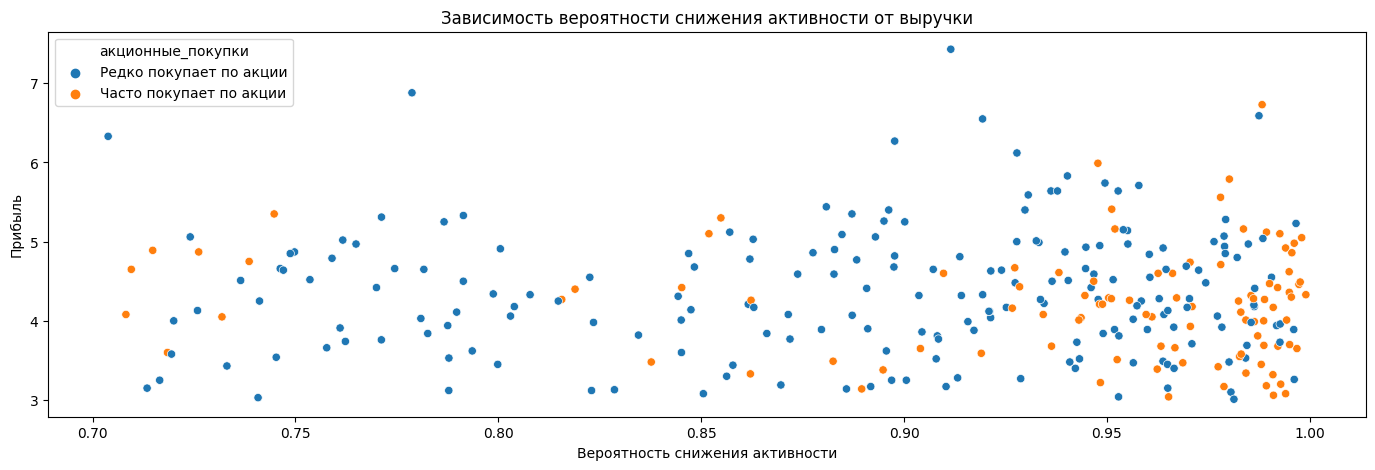

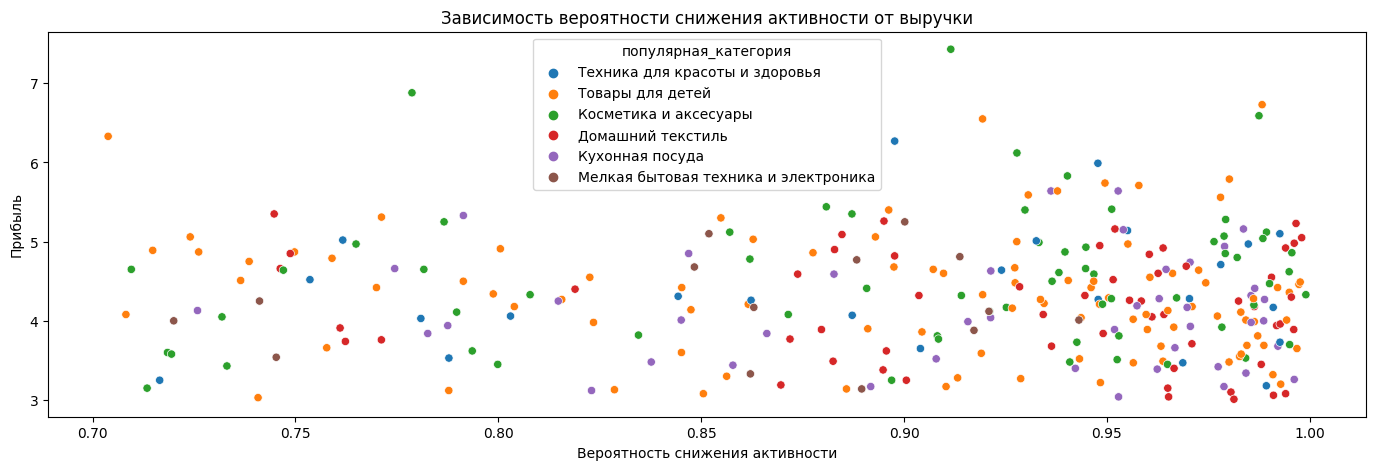

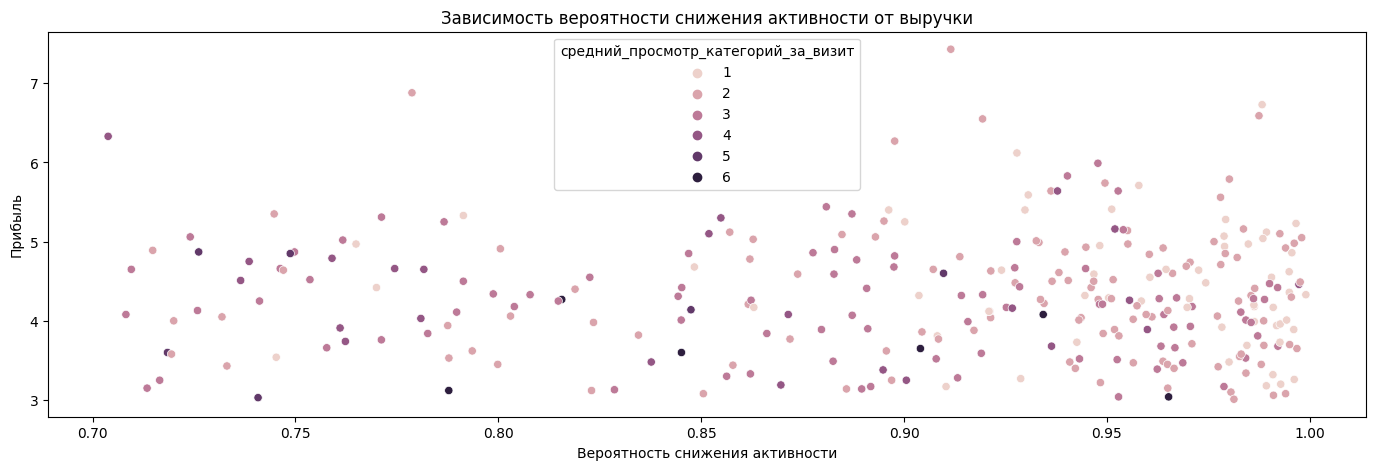

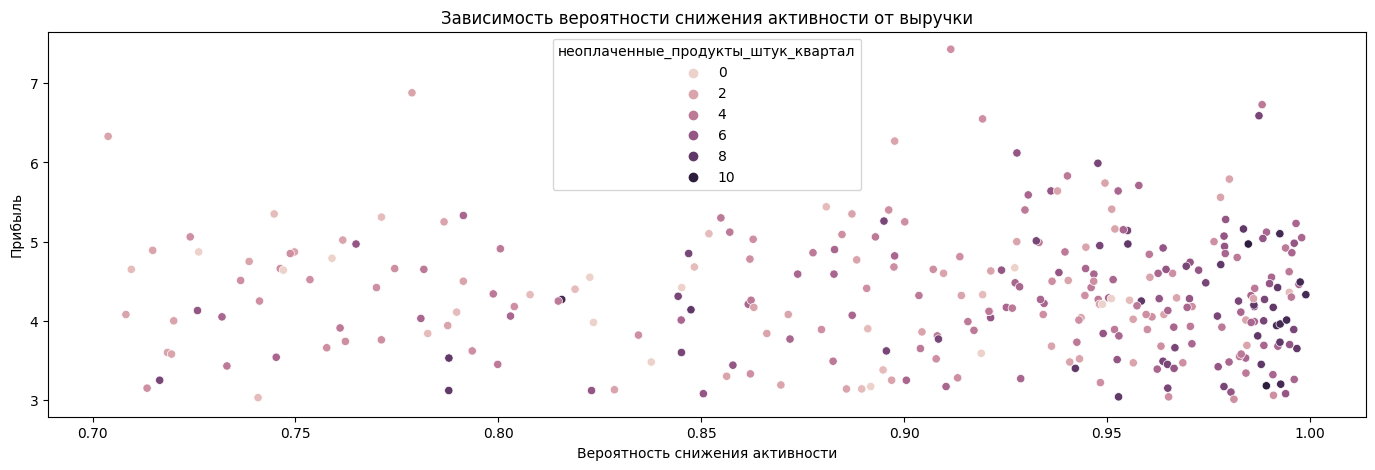

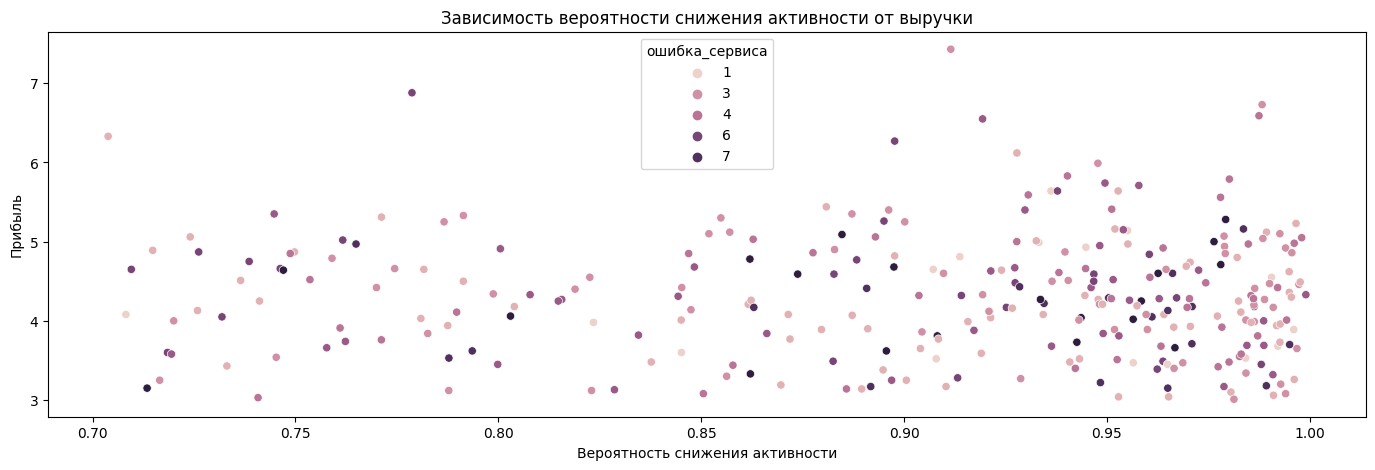

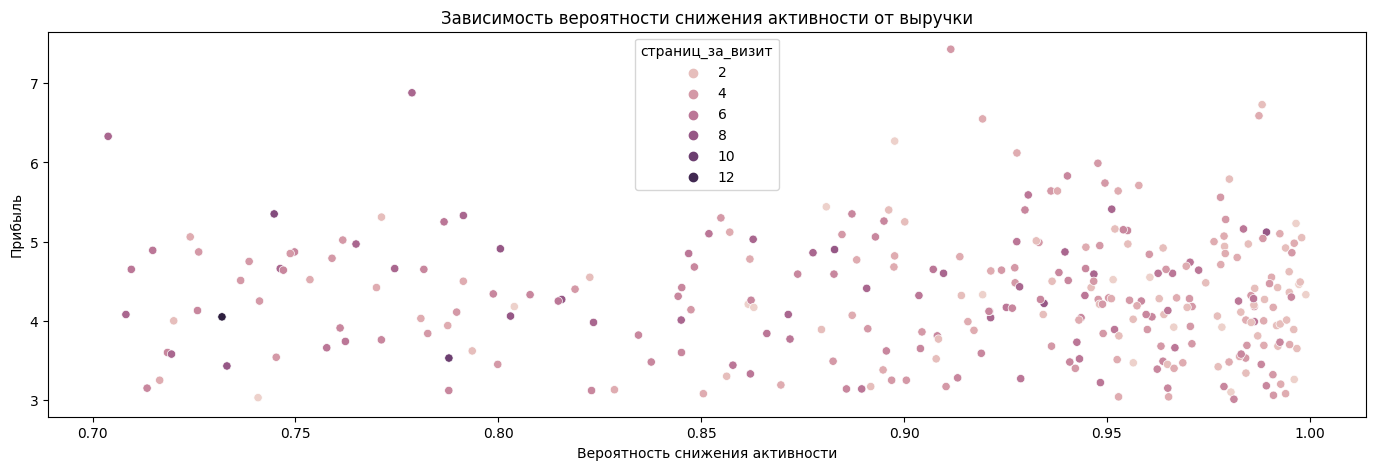

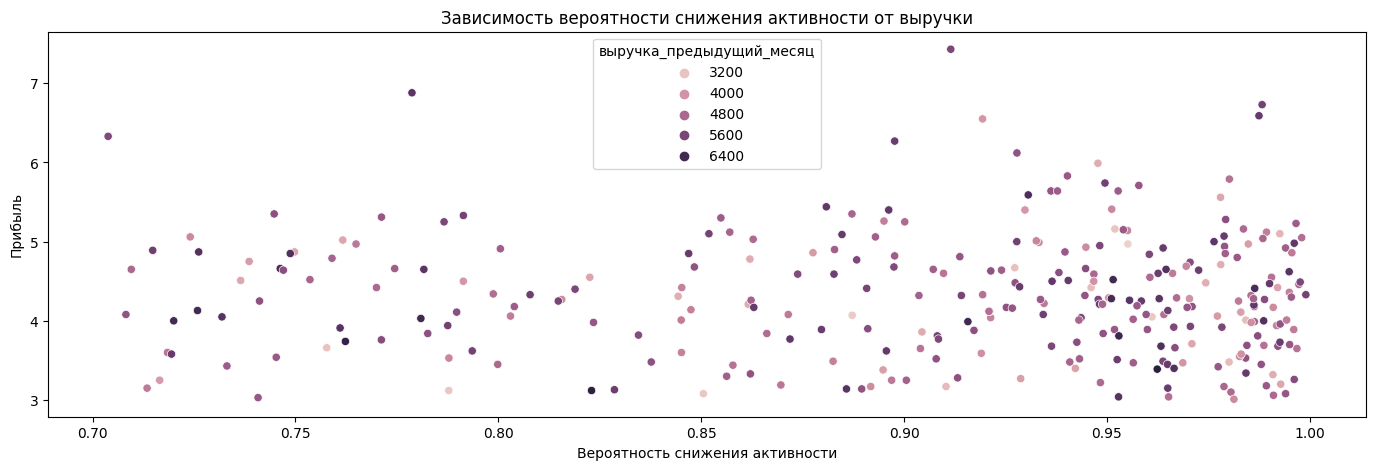

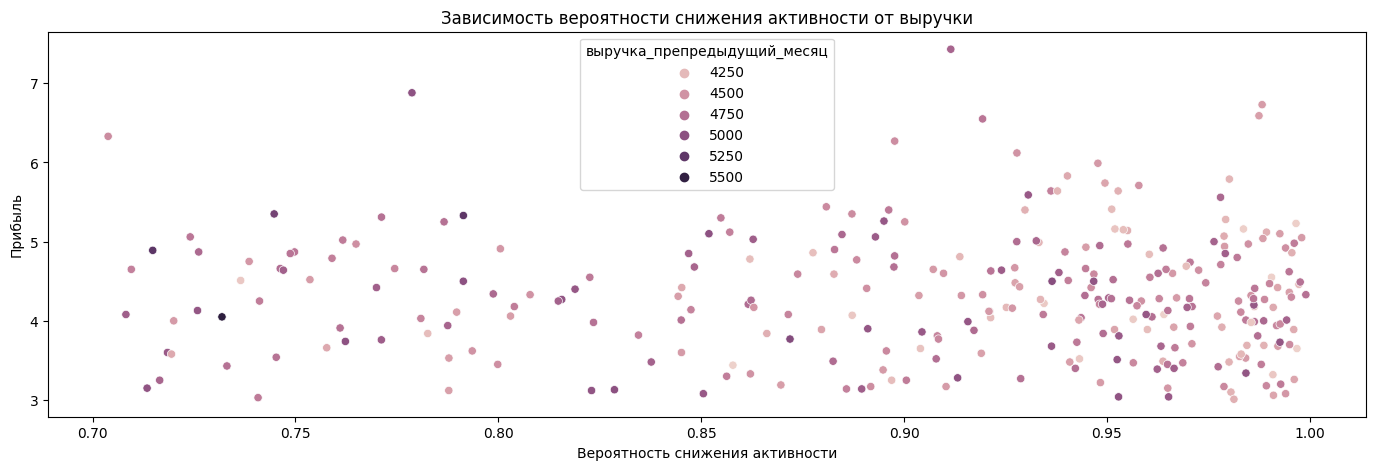

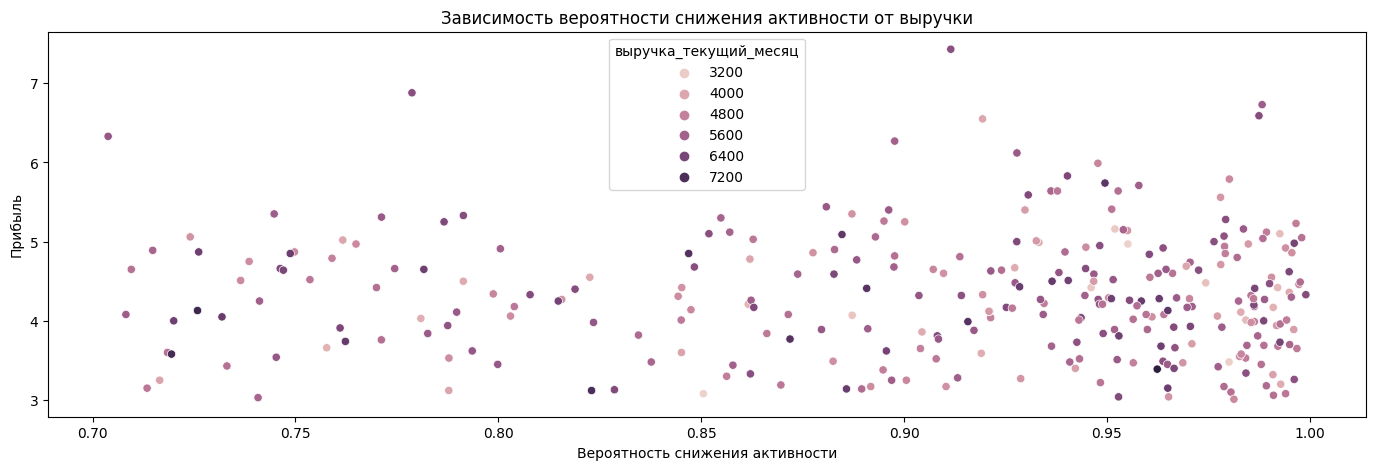

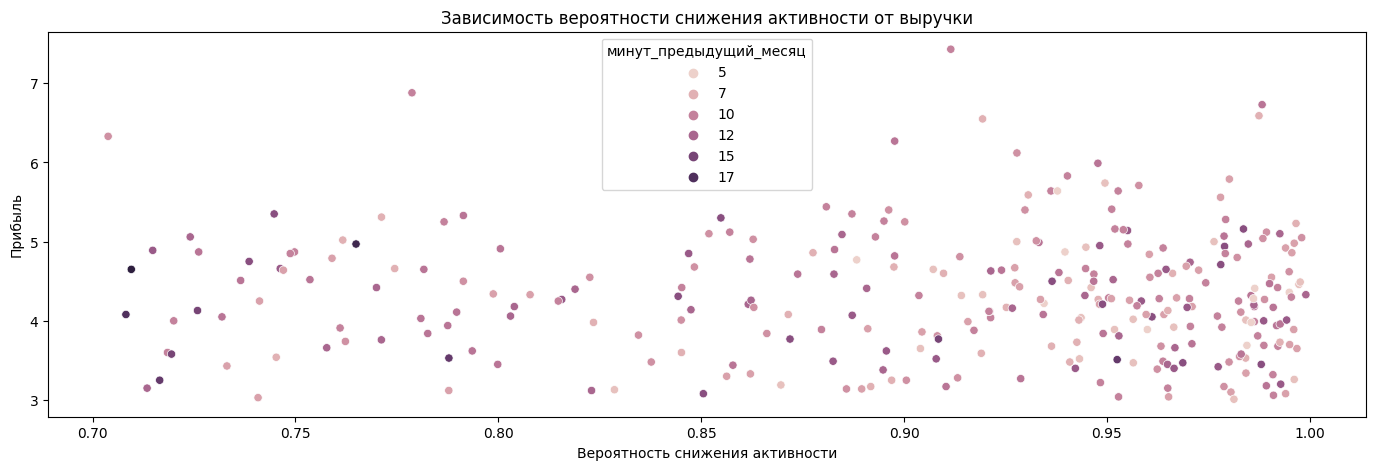

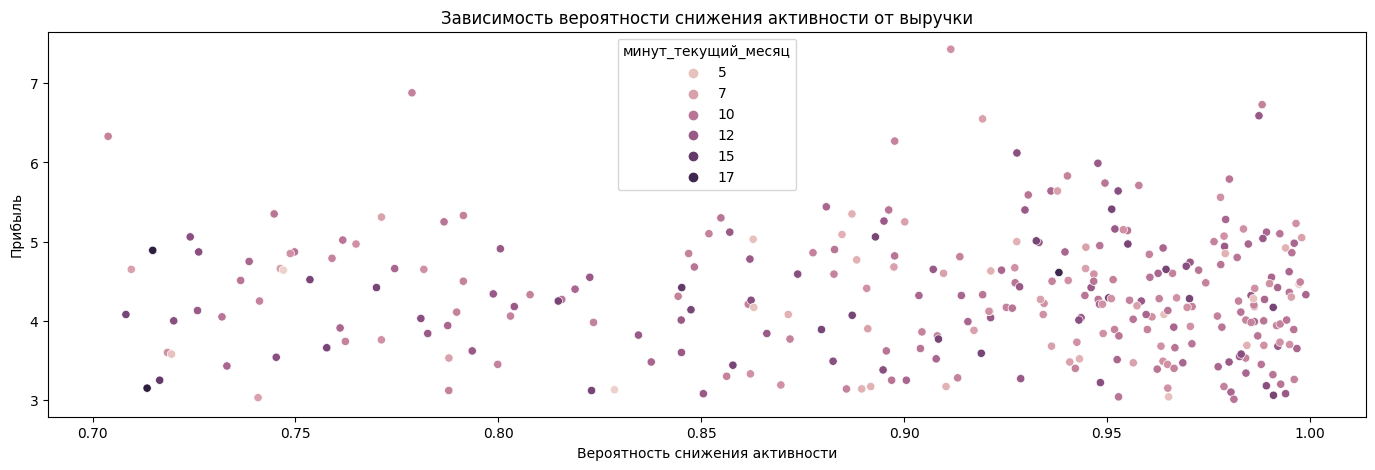

In [ ]:
columns = seg_1.drop(columns=['вероятность_снижения', 'прибыль']).columns.to_list()
scatterplots(columns)

Среди графиков распределения выделяется распределение с признаком **акционные_покупки** на нем видно что те кто часто покупает по акции имеют более высокую вероятность снижения активности, рассмотрим их подробнее

In [ ]:
def categoral_unique(df, col):
    plt.figure(figsize = (17,5))
    plt.title('Гистограмма категорий для тех кто часто покупает по акции', fontsize=14)
    sns.countplot(data=seg_1, x=seg_1.query('акционные_покупки=="Часто покупает по акции"')['акционные_покупки'], hue=col)
    plt.xlabel('Категории', fontsize=14)
    plt.ylabel('Колличество', fontsize=14);
    
    
    

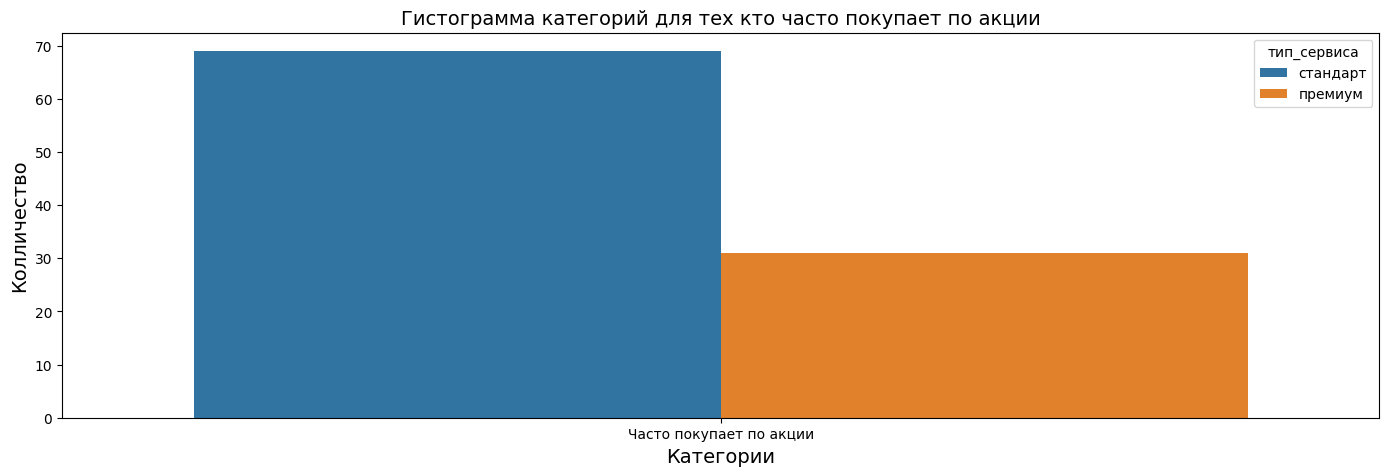

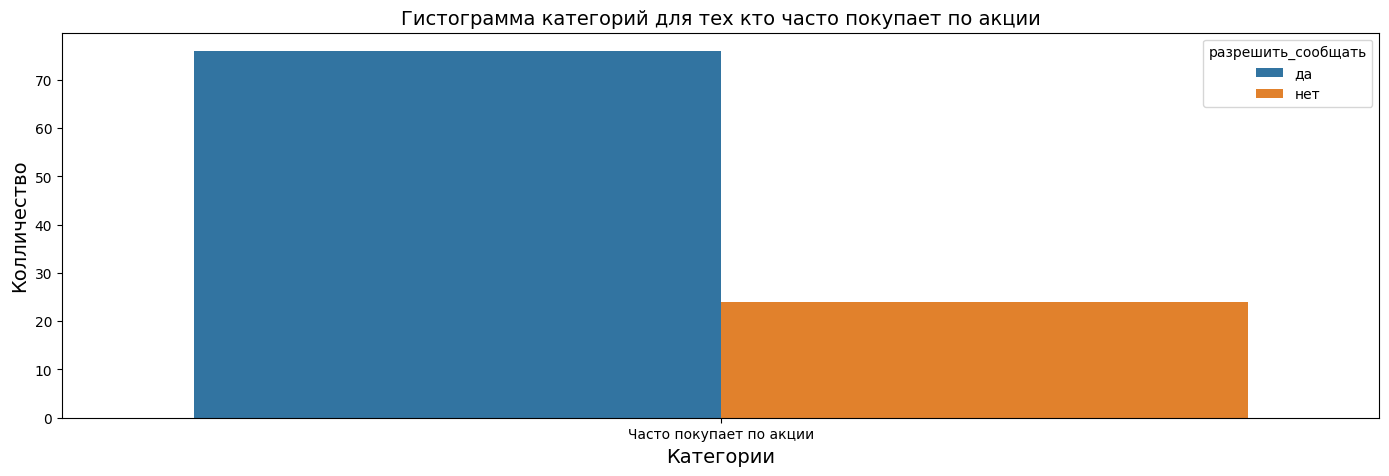

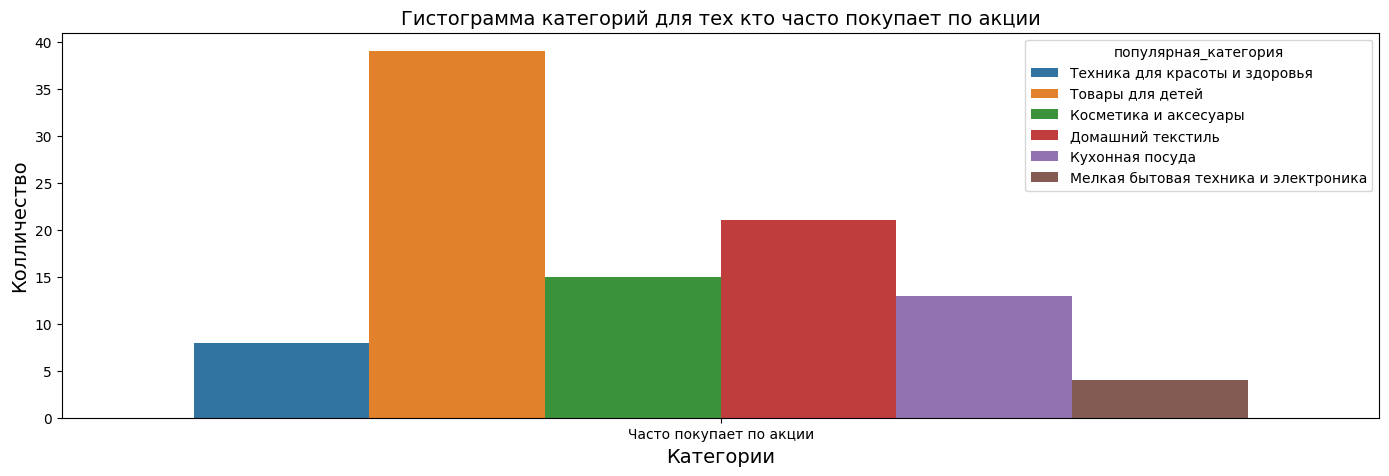

In [ ]:
cat_col_seg_1 = seg_1.drop(columns='акционные_покупки').select_dtypes(exclude='number').columns.tolist()
for col in cat_col_seg_1:
    categoral_unique(seg_1, col)

Среди тех кто часто покупает по акции преобладает тип сервиса **"стандарт"** часто разрешают присылать дополнительные предложения о товаре и самая популярная категория **"Товары для детей"**

Вывод:

Мы взяли сегмент покупателей с большой вероятностью снижения покупательской активности и прибылью от 3, рассмотрели их характеристики и на основе сделанных наблюдений для удержания активности покупателей можно предпринять следующее:

- Более детально объяснить клиенту выгоду которую он получит после приобретения премиум обслуживания на сервисе, возможно предоставить скидку на первый период

- Расширить ассортимент в популярных категориях 

- Расширить программу скидок в популярных категориях

- Напоминать об оставленных в корзине товарах

    

## Общий вывод


Задачей проекта было создать модель, которая предскажет снижение покупательской активности клиентов в ближайшие 3 месяца, используя полученные предсказания и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

Исходные данные представляли собой совокупность групп признаков (коммуникация с клиентом, продуктовое поведение, финансовое поведение, поведение на сайте) в виде таблицы.

На этапе предобработки были исправлены опечатки, удалены аномалии и данные о клиентах, которые не проявляли активность в последние 3 месяца.

Для поиска лучшей модели: 
- Категориальные данные были закодированы двумя способами
- С помощью автоматического подбора были выбраны  методы масштабирования количественных данных, гиперпараметры для лучшей модели и сама модель. Ей стала модель логистической регрессии с l1 регуляризацией ее ROC-AUC на тренировочной выборке 0.8968, на тестовой 0.9183

На основе анализа важности признаков и исследовательском анализе выбранного сегмента покупателей были предложены шаги для удержания покупательской активности клиентов.

